<center><font size=6.5>                 Project: RAG-Based Medical Assistant</font></center>


# **Problem Statement**

## Business Context

The healthcare industry is rapidly evolving, and professionals face increasing challenges in managing vast volumes of medical data while
delivering accurate and timely diagnoses. Quick access to comprehensive, reliable, and up-to-date medical knowledge is critical for
improving patient outcomes and ensuring informed decision-making in a fast-paced environment.

Healthcare professionals often encounter information overload, struggling to sift through extensive research and data to create accurate
diagnoses and treatment plans. This challenge is amplified by the need for efficiency, particularly in emergencies, where time-sensitive
decisions are vital. Furthermore, access to trusted, current medical information from renowned manuals and research papers is essential for
maintaining high standards of care.

To address these challenges, healthcare centers can focus on integrating systems that streamline access to medical knowledge, provide
tools to support quick decision-making and enhance efficiency. Leveraging centralized knowledge platforms and ensuring healthcare
providers have continuous access to reliable resources can significantly improve patient care and operational effectiveness.

Common Questions to Answer

1. Diagnostic Assistance: "What are the common symptoms of appendicitis, and can it be cured with medication? If not, what surgical procedure is typically followed for treatment?"

2. Drug Information: "What are the effective treatments for sudden patchy hair loss (localized bald spots), and what are the possible underlying causes?"

3. Treatment Plans: "What treatments are recommended for a person who has sustained a physical brain injury resulting in temporary or permanent impairment of brain function?"

4. Specialty Knowledge: "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for proper care and recovery?"

5. Critical Care Protocols: "What is the protocol for managing sepsis in a critical care unit?"

## Objective

As an AI specialist, your task is to develop a RAG-based AI solution using renowned medical manuals to address healthcare challenges. The objective is to **understand** issues like information overload, **apply** AI techniques to streamline decision-making, **analyze** its impact on diagnostics and patient outcomes, **evaluate** its potential to standardize care practices, and **create** a functional prototype demonstrating its feasibility and effectiveness.

## Data Description

The **Merck Manuals** are medical references published by the American pharmaceutical company Merck & Co., that cover a wide range of medical topics, including disorders, tests, diagnoses, and drugs. The manuals have been published since 1899, when Merck & Co. was still a subsidiary of the German company Merck.

The manual is provided as a PDF with over 4,000 pages divided into 23 sections.

# **Question Answering using Large Language Models (LLM)**

## Installing and Importing Necessary Libraries and Dependencies

### LLM Setup: Importing Libraries and Loading the Model

In [ ]:
# Installing Hugging Face Transformers and Accelerate libraries for loading and running LLMs
!pip install transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Logging into Hugging Face Hub using your access token to enable model downloads
from huggingface_hub import login
login("XXXXXXX")

- We use login() because some models on Hugging Face (like Mistral) require authentication to access. Logging in with a token grants permission to download such models.

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Define the Hugging Face model ID for Mistral-7B-Instruct
model_id = "mistralai/Mistral-7B-Instruct-v0.3"

# Load the tokenizer for the specified model
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Load the pre-trained causal language model with automatic device mapping and half-precision (float16) for better performance
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",
    torch_dtype=torch.float16
)
# We use torch.float16 to reduce memory usage and improve inference speed, allowing efficient execution of large models like Mistral.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/141k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.55G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

### Mistral response generator function

In [ ]:
def generate_mistral_response(user_prompt):
    system_message = "<<SYS>> You are a helpful assistant. <</SYS>>"
    prompt = f"[INST] {system_message}\n{user_prompt} [/INST]"

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=256,
        temperature=0.7,
        top_p=0.9,
        do_sample=True,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.eos_token_id
    )

    response_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response_text
# Note: You can modify these parameters (max_new_tokens, temperature, top_p, etc.)
# to control how the model generates responses.

- system_message – Defines how the model should behave. In this case, it's set to "You are a helpful assistant." A well-crafted system message can improve output quality.

- prompt – Combines the system message and user prompt using [INST] and <<(SYS)>> tags. These special tokens guide the model to treat the input as an instruction.

- **inputs: Unpacks all required inputs (like input_ids, attention_mask) into the model.

- max_new_tokens=256: Limits the response length to a maximum of 256 new tokens.

- temperature=0.7: Controls randomness in choosing next words. Lower = more focused, higher = more diverse.
 - 0.7 means 70% confidence, 30% randomness.

- top_p=0.9: Enables nucleus sampling, choosing from the top 90% probable next tokens.

- do_sample=True: Enables sampling instead of greedy decoding (adds randomness and variation).

- eos_token_id: Specifies the end-of-sequence token (when to stop generating).

- pad_token_id: Used for padding if needed (same as eos_token_id to avoid errors in some models).

- response_text: Decode the generated token IDs into text, removing special tokens

## Question Answering using LLM(Before Tuning)

#### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_prompt = "What is the protocol for managing sepsis in a critical care unit?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. <</SYS>>
What is the protocol for managing sepsis in a critical care unit?  Managing sepsis in a critical care unit involves a systematic and rapid approach due to its life-threatening nature. The protocol typically follows the guidelines set by the Surviving Sepsis Campaign (SSC), which is an international collaboration of critical care experts. Here's a simplified version of the protocol:

1. **Recognition**: Suspect sepsis in any patient with signs of infection and organ dysfunction. Early recognition is key.

2. **Quick Resuscitation**: Within the first 3 hours of sepsis recognition, initiate resuscitation measures. This includes:
   - Maintain mean arterial pressure (MAP) ≥ 65 mmHg (or a systolic blood pressure ≥ 100 mmHg for patients with severe sepsis or septic shock)
   - Central venous pressure (CVP) ≥ 8 mmHg or dynamic assessment of tissue perfusion (e.g., lactate clearance)
   - Urine output ≥ 0.5 ml/kg/min

3. **Antibiotics**: Administer

- Mistral provided the response within 256 tokens and without hallucination.

- There are minor formatting issues: it starts the answer immediately after the question without a line break, which affects readability.

- Headings like “Recognition” and “Quick Resuscitation” could be refined for clarity.

- These formatting issues can be easily addressed using a system message.

#### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_prompt = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. <</SYS>>
What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?  Appendicitis is a medical emergency that typically requires surgical intervention. The common symptoms of appendicitis include:

1. Sudden pain in the lower right abdomen that starts around the navel and moves to the right.
2. Loss of appetite.
3. Nausea and vomiting.
4. Fever.
5. Abdominal swelling.
6. Constipation or diarrhea.
7. Inability to pass gas or have a bowel movement.
8. Feeling bloated.
9. General discomfort or uneasiness.

It's important to note that the symptoms may vary and can sometimes be mild at first, which can make the diagnosis challenging. If you suspect appendicitis, seek medical attention immediately.

Appendicitis cannot be cured with medicine alone. The standard treatment is an appendectomy, a surgical procedure to remove the appendix. This can be done through a tradition

- Mistral performed well by keeping the response within 256 tokens and avoiding hallucinations.

- It correctly stated that appendicitis cannot be treated with medicine.

- The user asked about medical treatment first, but the model started with symptoms instead.

- The final sentence (“After surgery, recovery time varies”) was left incomplete.

- Minor improvements in structure and closure could enhance quality.

#### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_prompt = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. <</SYS>>
What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?  Sudden patchy hair loss, also known as alopecia areata, is an autoimmune disorder that causes the body's immune system to attack hair follicles. Here are some potential treatments and possible causes:

1. **Causes**: Alopecia areata is often idiopathic, meaning the exact cause is unknown. However, it's believed to be an autoimmune disease, and it may be triggered by stress, illness, or hormonal changes. Other factors like genetics and vitamin deficiencies might also play a role.

2. **Treatments**:

   - **Topical treatments**: Corticosteroids can be applied directly to the affected area to reduce inflammation and suppress the immune system.

   - **Injections**: Corticosteroids can also be injected directly into the bald spots. This is often more effecti

- This model performed really well—it managed tokens effectively and avoided hallucinating.
- Crucially, even though the user asked about the causes of the disease at the end, the model recognized its importance and addressed that question first.
- There’s an incomplete sentence regarding oral medication in the treatment section, and a similar issue appears under the heading.

#### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_prompt = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. <</SYS>>
What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?  Treatment for a brain injury can vary greatly depending on the severity, location, and extent of the damage. Here are some common interventions:

1. **Initial Care**: This usually involves managing airway, breathing, and circulation, and preventing further injury. This might require hospitalization and intensive care.

2. **Medication**: Depending on the symptoms, various medications may be prescribed to manage headaches, seizures, or other complications.

3. **Rehabilitation**: This is a key part of treatment for many brain injuries. It can include physical therapy, occupational therapy, speech-language therapy, and cognitive rehabilitation to help the person regain lost skills and manage any remaining impairments.

4. **Surgery**: In some cases, surgery may be necessary to rem

- Mistral generated the response within 256 tokens and without hallucinations.

- The content was relevant and well-structured, but formatting issues were observed across all headings — such as “Initial Care,” “Medication,” “Rehabilitation,” “Surgery,” “Psychological Support,” and “Lifestyle Changes.”

- These headings could be refined for better clarity and consistency.

- Additionally, the response often ends with an incomplete sentence, indicating the need for further tuning.

- Both the formatting and sentence completion issues can likely be addressed by enhancing the system message and adjusting generation parameters to enforce standardized structure and length.

#### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_prompt = " What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. <</SYS>>
 What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?  In the event of a leg fracture during a hiking trip, the following steps should be taken:

1. **Immediate Care**: Apply a splint immediately to immobilize the fractured leg. This can be done using materials like sticks, clothing, or a pre-made splint if available. The goal is to prevent any movement of the fracture to minimize pain and potential damage.

2. **Emergency Medical Attention**: If possible, call for emergency medical help. If signal is weak or non-existent, the injured person should be carried out of the wilderness by others in the group or bypassed if they are unable to be moved.

3. **Transport**: Once medical help is available, the person should be transported to the nearest hospital. In some cases, this might involve a helicopter evacuation.

4. **H

- Mistral provided the response within 256 tokens and without hallucination.

- However, there are minor formatting issues: it starts the answer immediately after the question without a line break, which affects readability.

- Headings like “Recognition” and “Quick Resuscitation” could be refined for clarity.

- These formatting issues can be resolved using a system message to enforce consistent spacing and heading style.

## Question Answering using LLM Parameter Tuning with Prompt Engineering

### Combination 1:Tuning LLM Parameters to Address Identified Issues

- In the above setup, even without tuning the parameters or prompt, we observed a few consistent issues:

 - The model often responds without proper spacing after questions, which affects readability.

 - Some responses end with incomplete sentences, indicating the need for prompt adjustments or parameter tuning to finalize the output cleanly.

- As the first step to improve the model’s responses, we will focus on hyperparameter tuning. After that, we will apply prompt engineering, mainly through the system message. Since the questions are predefined, we don't have the flexibility to modify the actual user prompts.

#### Tuning Mistral response generator function

In [ ]:
def generate_mistral_response(user_prompt):
    system_message = "<<SYS>> You are a helpful assistant. <</SYS>>"
    prompt = f"[INST] {system_message}\n{user_prompt}\n\n[/INST]"

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=512,
        temperature=0.7,
        top_p=0.9,
        do_sample=True,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.eos_token_id
    )

    response_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response_text

We have made several adjustments to the model parameters, as outlined below.
- Added an extra newline (\n\n) between the question and answer to improve clarity and separation.

- Increased max_new_tokens from 256 to 512 to reduce incomplete sentence endings.


#### Prompt-Response Evaluation with Conclusions and Insights

##### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_prompt = "What is the protocol for managing sepsis in a critical care unit?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. <</SYS>>
What is the protocol for managing sepsis in a critical care unit?

 Managing sepsis in a critical care unit involves a systematic approach that follows the guidelines established by organizations such as the Surviving Sepsis Campaign (SSC). Here's a general outline of the protocol:

1. **Recognition**: Early recognition of sepsis is crucial. The Sepsis-3 definition identifies sepsis as life-threatening organ dysfunction caused by a dysregulated host response to infection.

2. **Initial Resuscitation**: Within the first 3 hours of recognition, perform the following steps:
   - **Mean arterial pressure (MAP) goal**: Achieve a MAP ≥ 65 mmHg.
   - **Fluid resuscitation**: Give 30 mL/kg crystalloids over the first 3 hours.
   - **Blood lactate measurement**: Obtain a blood lactate level and repeat every 2 hours until it's normal (<2 mmol/L).
   - **Obtain blood cultures before starting antibiotics**: If sepsis is suspected, take at least two set

- By simply increasing the max_new_tokens, we observed a significant improvement in the model's response — both in terms of completeness and depth of the answer. The model was able to provide more structured and detailed content.

- However, some formatting issues still persist, such as inconsistent or excessive markdown symbols (e.g., extra asterisks in headings), which need to be addressed.

- Additionally, the updated response included more medical details and interventions that were not present in the earlier output, indicating improved coverage when the token limit is extended.

##### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_prompt = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. <</SYS>>
What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

 Appendicitis is a medical condition characterized by inflammation of the appendix, a small tube-shaped organ attached to the large intestine in the lower right abdomen. Here are some common symptoms:

1. Sudden sharp pain around the navel or lower right abdomen that becomes constant and intense.
2. Loss of appetite.
3. Nausea and vomiting.
4. Fever.
5. Abdominal swelling.
6. Inability to pass gas or have a bowel movement.

If left untreated, appendicitis can lead to a ruptured appendix, which is a medical emergency. A ruptured appendix can cause peritonitis, a serious inflammation of the abdominal cavity lining, which can lead to sepsis, a potentially life-threatening condition.

Treatment for appendicitis typically involves surgical removal of the appendix, a procedure called an appendectomy. Th

- Here we can observe that the model clearly explains the consequences of not treating the condition, whereas the previous response stopped before completing.

- However, mentioning the consequences of leaving it untreated should be framed as a caution, not presented as additional information. Since it was not part of the original question, it should not be mixed directly into the main answer.

- The response ended clearly and logically — no truncation issues this time.
Formatting was clean — bulleted symptom list, readable structure, no extra symbols or markdown errors.

##### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_prompt = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. <</SYS>>
What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

 I'm glad you've reached out with your question! Sudden patchy hair loss, also known as alopecia areata, can be concerning. It's a common autoimmune disorder where the immune system mistakenly attacks hair follicles, causing hair loss.

Here are some potential treatments for alopecia areata:

1. Topical corticosteroids: These are creams or ointments that reduce inflammation and suppress the immune system. They can be applied directly to the affected areas.

2. Injections: In some cases, a dermatologist may inject the corticosteroid directly into the bald spots. This is called intralesional steroid therapy.

3. Immunomodulators: These are medications that work by modifying the immune system. Examples include minoxidil (Rogaine) and anthralin.

4. Photother

- So far, this is the most well-structured response — the model began with a polite introduction, which added a helpful and engaging tone.

- The explanation is clear and organized into well-formatted bullet points, improving readability and user understanding.

- There were no formatting issues such as unnecessary markdown symbols (e.g., extra asterisks), which were present in some previous responses.

- The model covered both treatment options and possible causes, staying fully aligned with the question.

- The conclusion appropriately advises consulting a medical professional, which reinforces both safety and reliability in the response.

##### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_prompt = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. <</SYS>>
What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

 Treatment for a physical injury to brain tissue, also known as a traumatic brain injury (TBI), can vary greatly depending on the severity and location of the injury. Here are some common interventions:

1. Emergency care: In the immediate aftermath, the primary goal is to ensure the patient's airway is clear, they are breathing, and have a stable circulatory system.

2. Surgery: If there is a hematoma (a collection of blood) or a fracture in the skull pressing on the brain, surgery may be necessary to relieve the pressure.

3. Medication: Various medications may be used to manage symptoms such as pain, seizures, or increased intracranial pressure.

4. Rehabilitation: This is a crucial part of TBI treatment. It can include physical therapy, occupational therapy, speech-language 

- The model’s response is clear, accurate, and well-structured.

- It includes complete sentences and avoids truncation issues seen in earlier outputs.

- The use of bullet points enhances readability, and there are no extra markdown artifacts like asterisks or formatting glitches.

- It successfully covers all major treatment options for traumatic brain injury, showing a comprehensive understanding of the topic.

- However, it lacks the polite opening line that added warmth in previous responses.

- It also misses a concluding recommendation to consult a medical professional, which is important for safety and completeness in healthcare-related answers.

##### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_prompt = " What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. <</SYS>>
 What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

 In the event of a leg fracture during a hiking trip, the following steps should be taken:

1. **Immediate Care:** Ensure the safety of the injured person and others in the area. Do not move the person unless it's necessary to prevent further injury or danger.

2. **Immobilize the Fracture:** If you have a splint available, use it to immobilize the fracture. If not, you can use items like a stick, shirt, or backpack to create a makeshift splint. Avoid putting anything under the heel, as this can cause more harm.

3. **Elevate the Injury:** If possible, elevate the injured leg above heart level to reduce swelling.

4. **Call for Help:** If you're not in a remote area, call for help immediately. If you are in a remote area, notify authorities when you can.

5. **Pain

- This response is well-structured, dividing the answer into two clear sections: on-site precautions during hiking and medical treatment after reaching a facility.

- The step-by-step guidance is practical and thorough, covering emergency care, stabilization, transport, treatment, and rehabilitation.

- It includes recovery time considerations, which were missing in earlier responses due to truncation — this shows improved completeness in generation.

- However, the formatting still includes markdown syntax like asterisks for headings (e.g., **Immediate Care:**), which appears inconsistently across responses. This suggests the issue occurs randomly, depending on generation dynamics or output length.

- The content is informative and follows a logical order, making it easy to follow.

- One minor gap is the absence of a final recommendation to consult a medical professional, which is especially important for safety and credibility in health-related answers.

### Combination 2:Tuning the System Message to Improve Response Quality and Ensure Responsible Guidance

- In the previous tuning, we successfully resolved the issue of incomplete sentences. However, we are still encountering extra markdown formatting (such as asterisks) in the headings, which needs to be addressed in the next phase of parameter tuning.

- Here, we are tuning the system message to promote responsible responses when medical information is involved, helping to prevent users from acting without proper professional guidance.

In [ ]:
system_message =(
    "<<SYS>> You are a helpful assistant. Respond to the user's question based strictly on the given prompt. "
    "If the response involves technical or medical information, advise the user to consult a qualified professional "
    "or refer to a credible source. <</SYS>>")


In [ ]:
def generate_mistral_response(user_prompt):
    prompt = f"[INST] {system_message}\n\n{user_prompt}\n\n[/INST]"

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=512,
        temperature=0.7,
        top_p=0.9,
        do_sample=True,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.eos_token_id
    )

    response_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response_text

#### Prompt-Response Evaluation with Conclusions and Insights

##### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_prompt = "What is the protocol for managing sepsis in a critical care unit?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. Respond to the user's question based strictly on the given prompt. If the response involves technical or medical information, advise the user to consult a qualified professional or refer to a credible source. <</SYS>>

What is the protocol for managing sepsis in a critical care unit?

 The management of sepsis in a critical care unit typically involves a systematic approach known as the "SEPSIS Protocol" or "Surviving Sepsis Campaign Guidelines." Here's a simplified version of the steps:

1. **Identification**: Recognize sepsis early by identifying signs and symptoms such as fever, chills, rapid heart rate, rapid breathing, and confusion.

2. **Resuscitation**: If sepsis is suspected, immediately begin resuscitation. This includes administering oxygen, fluids, and vasopressors if necessary to maintain blood pressure.

3. **Measurement**: Measure and record lactate level, which can help assess the severity of sepsis.

4. **Antibiotics**: Administer b

- The system message is effective: the model gives a cautious, responsible answer and ends by advising to seek professional care, as intended.

- The response is structured, informative, and aligned with standard clinical practice (Surviving Sepsis Campaign).

- All points are concise and readable, with a clear protocol flow (recognition → stabilization → monitoring).

##### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_prompt = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. Respond to the user's question based strictly on the given prompt. If the response involves technical or medical information, advise the user to consult a qualified professional or refer to a credible source. <</SYS>>

What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

 Appendicitis is a medical condition characterized by inflammation of the appendix, a small tube-shaped organ attached to the colon. Common symptoms include:

1. Sudden sharp pain that starts near the navel and moves to the lower right abdomen.
2. Loss of appetite.
3. Nausea and vomiting.
4. Abdominal swelling.
5. Fever.
6. Constipation or diarrhea.
7. Abdominal bloating or gas.
8. Reduced urine output.

If you suspect appendicitis, it's crucial to seek immediate medical attention as appendicitis can be life-threatening if left untreated.

Regarding treatment, appendicitis typically requires

- The model now provides a clear, well-structured explanation of appendicitis that is easy to understand even for someone without a medical background.

- The symptoms are listed in a straightforward manner using bullet points, which improves readability and comprehension.

- The response also includes an appropriate warning to seek immediate medical attention, highlighting the seriousness of untreated appendicitis.

- It clearly explains the standard treatment (appendectomy), including both open and laparoscopic options, with appropriate conditions for each.

- The final advisory — not to rely solely on online information and to consult a medical professional — aligns perfectly with the intent of the system message.

- Overall, this is one of the most complete and user-responsible responses generated so far, both in content and tone.

##### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_prompt = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. Respond to the user's question based strictly on the given prompt. If the response involves technical or medical information, advise the user to consult a qualified professional or refer to a credible source. <</SYS>>

What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

 While I can provide some general information about patchy hair loss, it's important to consult a healthcare professional or a dermatologist for accurate diagnosis and treatment options. Here are some possible causes and general information about patchy hair loss:

1. Alopecia Areata: This is an autoimmune disorder that causes hair loss in small, round patches on the scalp. It can affect people of all ages and ethnicities.

2. Telogen Effluvium: This type of hair loss occurs when a large number of hair follicles enter the resting phase (telogen) at 

- The model begins and ends the response with appropriate caution, consistently advising the user to consult a healthcare professional — aligning well with the intent of the system message.

- It effectively outlines different types of patchy hair loss (Alopecia Areata, Telogen Effluvium, Traction Alopecia, Tinea Capitis) and explains their causes in simple terms, making the information accessible to non-experts.

- However, the response falls short in delivering specific treatment details, even though the user explicitly asked for effective treatments or solutions. Since the model already gives a disclaimer about seeking professional help, it could have safely included general treatment options (e.g. corticosteroids, minoxidil, antifungal treatments) to enhance completeness.

- Structurally, the content is organized and easy to read, with a clear separation between causes and general guidance — which helps with understanding.

- Overall, the tone is responsible, the information is accurate, and the formatting is clean — but the lack of treatment specifics limits the practical usefulness of the answer.

##### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_prompt = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. Respond to the user's question based strictly on the given prompt. If the response involves technical or medical information, advise the user to consult a qualified professional or refer to a credible source. <</SYS>>

What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

 I'm not a doctor, but I can try to help you understand the general approach to treating brain injuries. It's important to consult a qualified healthcare professional for accurate information and treatment options.

Treatment for brain injuries can include:

1. Emergency care: Immediate care may involve managing airway, breathing, and circulation, controlling any bleeding, and preventing further injury.

2. Medication: Depending on the symptoms, doctors may prescribe medication to manage pain, reduce swelling, prevent or control seizures, or treat infections.

3. Surgery: 

- The response follows the same responsible pattern as previous answers — starting with a disclaimer and ending with a strong recommendation to consult a healthcare professional.

- The model provides a clear and organized structure, outlining general categories of brain injury treatment such as emergency care, medication, surgery, and rehabilitation.

- However, the user’s question specifically asked for “treatments”, and the model includes lifestyle changes and assistive devices, which are more accurately part of post-treatment or long-term recovery support, not core treatment modalities.

- While these elements are valid in context, their inclusion slightly dilutes the focus on actual medical treatments that directly address brain tissue injury.

- The response is concise and readable, but lacks depth or detail in explaining the medical interventions (e.g., what kind of surgeries, which medications, or rehab specifics).

- Overall, it's responsible and structurally sound but could be improved by focusing more sharply on the primary medical treatments and distinguishing them from recovery aids.

##### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_prompt = " What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. Respond to the user's question based strictly on the given prompt. If the response involves technical or medical information, advise the user to consult a qualified professional or refer to a credible source. <</SYS>>

 What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

 In case of a leg fracture during a hiking trip, it's crucial to follow these steps:

1. **Immediate care:** Apply a splint or immobilize the fractured leg to prevent further damage. Use items like a stick, clothing, or backpack to create a makeshift splint. Avoid moving the leg excessively.

2. **Elevation and immobilization:** Keep the injured leg elevated above the heart level to reduce swelling. If possible, use a hiking pole, backpack, or other gear to support the leg during transportation.

3. **Seek professional help:** As soon as you reach a medical f

- Unlike previous responses, this answer fails to follow the system message properly, as it does not include a clear disclaimer advising the user to consult a medical professional — a key expectation from the tuned system prompt.

- The response only partially addresses the full scope of the prompt. It mostly focuses on field-level first aid and skips the detailed clinical treatment steps that should occur after reaching a hospital.

- In contrast, the earlier response for this same question provided a much more complete structure, clearly dividing the on-site precautions and the in-hospital treatment process, making it more helpful and aligned with the question.

- The random formatting issue with headings using markdown symbols (bold) continues here, showing inconsistency in how the model formats outputs.

- While the suggestions about hydration and prevention are sensible, they slightly drift from the core of the prompt, which was focused on precautions, treatment steps, and recovery considerations, not general wellness advice.

- In summary, this response lacks the disclaimer, skips key treatment details, and includes a few off-focus points — making it less aligned with the system tuning and prompt intent.

### Combination 3:Fine-Tuning LLM Parameters with a Predefined System Message for Improved Precision and Safety

- With the previously defined system message, we successfully ensured the inclusion of a disclaimer advising users to consult professionals when handling sensitive information such as medical or technical topics.

- Now, we will fine-tune further by adjusting parameters — specifically lowering the temperature (to make next-token prediction more precise) and setting do_sample to False for more deterministic outputs.

In [ ]:
system_message =(
    "<<SYS>> You are a helpful assistant. Respond to the user's question based strictly on the given prompt. "
    "If the response involves technical or medical information, advise the user to consult a qualified professional "
    "or refer to a credible source. <</SYS>>")


In [ ]:
def generate_mistral_response(user_prompt):
    prompt = f"[INST] {system_message}\n\n{user_prompt}\n\n[/INST]"

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=512,
        temperature=0.3,
        top_p=0.85,
        do_sample=False,
        repetition_penalty=1.2,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.eos_token_id
    )

    response_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response_text

- I set do_sample=False to make the model less creative and ensure it sticks closely to the core of the question. Although I also reduced the temperature from 0.7 to 0.3, this has no effect when do_sample is disabled, because temperature only applies when sampling is enabled.

- I’ve also added repetition_penalty to discourage repeated sentences or phrases. While repetition hasn't been a major issue in our previous responses, it's still a good precaution to improve response quality and maintain clarity.

#### Prompt-Response Evaluation with Conclusions and Insights

##### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_prompt = "What is the protocol for managing sepsis in a critical care unit?"
response = generate_mistral_response(user_prompt)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


<<SYS>> You are a helpful assistant. Respond to the user's question based strictly on the given prompt. If the response involves technical or medical information, advise the user to consult a qualified professional or refer to a credible source. <</SYS>>

What is the protocol for managing sepsis in a critical care unit?

 While I can provide you with some general guidelines about managing sepsis in a critical care unit, it's essential to remember that every patient and situation may be unique. Therefore, it's crucial to follow established clinical practice guidelines and always consult with healthcare professionals who specialize in critical care medicine. Here's an overview of the steps typically involved:

1. Early recognition: Recognizing sepsis early is vital for successful treatment. Look out for signs such as fever, chills, rapid heart rate, rapid breathing, confusion, and low blood pressure.

2. Quick resuscitation: Once sepsis has been identified, immediate action should be tak

- The model provides a well-structured and disciplined response, directly addressing the user’s question regarding the protocol for managing sepsis in a critical care setting.

- It appropriately begins with a disclaimer, advising consultation with medical professionals — aligning well with the tuned system message.

- All major steps of standard sepsis management are included: early recognition, resuscitation, source control, antimicrobial therapy, monitoring, and supportive measures.

- The headings are clean, with no extra markdown artifacts (e.g., double asterisks), and the sentences are complete — marking improvements in formatting and generation flow.

- However, compared to previous responses before tuning, the current output omits some specific medical details such as:

 - Example values for MAP (mean arterial pressure) or fluid resuscitation volume.

 - Mentions of lactate level monitoring, which is part of the Surviving Sepsis Campaign bundle.

 - Possible use of corticosteroids or glucose control, which were earlier included and are part of typical advanced protocols.

 **Note**: The warning about temperature and top_p being ignored appears because do_sample=False. Since sampling is disabled, these parameters have no effect — this is expected and not a concern.

##### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_prompt = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
response = generate_mistral_response(user_prompt)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


<<SYS>> You are a helpful assistant. Respond to the user's question based strictly on the given prompt. If the response involves technical or medical information, advise the user to consult a qualified professional or refer to a credible source. <</SYS>>

What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

 Common symptoms of appendicitis may include:
1. Sudden pain in the lower right abdomen that begins around the navel and moves lower.
2. Loss of appetite.
3. Nausea and vomiting.
4. Fever (often low-grade at first).
5. Abdominal swelling.
6. Pain worsens when walking or making sudden movements.
7. Inability to pass gas or have a bowel movement.

Appendicitis is typically treated with surgery, specifically an appendectomy, which removes the inflamed appendix. This procedure can either be performed as open surgery or laparoscopically, depending on the individual case. It's important to seek im

- The precautionary disclaimer (to consult a healthcare professional) is present but placed at the end of the response.

- In future tuning, it's better to position the disclaimer at the beginning for consistency and better alignment with safety guidelines.

- The model response is clear, concise, and easy to follow, especially for non-medical users.

- It avoids technical jargon and explains both symptoms and treatment options (appendectomy types) effectively.

- The response includes key symptoms of appendicitis:

 - Pain migration from the navel to lower right abdomen

 - Fever, nausea, vomiting

 - Movement-induced pain and bloating
- This covers most classical indicators.

 **Note**: The warning about temperature and top_p being ignored appears because do_sample=False. Since sampling is disabled, these parameters have no effect — this is expected and not a concern.

##### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_prompt = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
response = generate_mistral_response(user_prompt)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


<<SYS>> You are a helpful assistant. Respond to the user's question based strictly on the given prompt. If the response involves technical or medical information, advise the user to consult a qualified professional or refer to a credible source. <</SYS>>

What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

 While I can provide some general information about this topic, it is important to remember that I am not a doctor or a dermatologist. For accurate advice tailored to your specific situation, please consult with a healthcare professional.

Sudden patchy hair loss, also known as alopecia areata, occurs when the immune system mistakenly attacks hair follicles. Some potential causes include stress, genetics, autoimmune disorders, or vitamin deficiencies.

Treatment options may vary depending on the severity of the condition and individual factors. Here

- The model’s response is well-aligned with both the user prompt and the tuned system message. It opens with a clear disclaimer, advising consultation with a medical professional — which supports responsible use.

- The treatment section is thorough and well-structured, covering a range of effective medical options for patchy hair loss. Each method is clearly named and explained, making the response accessible even to non-medical users.

- However, the explanation of causes could have been slightly more detailed. While it does mention autoimmune factors, stress, and deficiencies, a bit more clarity or examples (e.g., specific deficiencies or autoimmune conditions) would have improved completeness.

- Overall, this response demonstrates strong alignment with tuning goals — especially in terms of structure, clarity, disclaimer positioning, and accurate treatment description.

 **Note**: The warning about temperature and top_p being ignored appears because do_sample=False. Since sampling is disabled, these parameters have no effect — this is expected and not a concern.

##### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_prompt = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
response = generate_mistral_response(user_prompt)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


<<SYS>> You are a helpful assistant. Respond to the user's question based strictly on the given prompt. If the response involves technical or medical information, advise the user to consult a qualified professional or refer to a credible source. <</SYS>>

What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

 I am not a doctor, but I can try to help you understand some common treatment approaches for traumatic brain injuries (TBIs). However, it is crucial that you seek advice from a healthcare professional for accurate and personalized guidance. Here are some general steps often taken:

1. Emergency care: In case of an accident causing head trauma, immediate attention should be sought at a hospital emergency room. This may include diagnostic tests like CT scans or MRI to assess the extent of damage.

2. Medication: Depending on symptoms, doctors might prescribe medication to m

- The response begins with a proper disclaimer, which aligns well with our tuned system message and reinforces responsible guidance.

- However, the core question specifically asked what treatments are recommended, while the answer mostly focuses on general care processes like diagnosis, rehabilitation, and emergency handling — which are supportive steps, not direct treatments.

- Despite this, the response maintains clarity, avoids unwanted markdown formatting (e.g., extra hashtags), and includes complete, readable sentences.

- For future tuning, the model should be guided to focus strictly on the requested type of information — in this case, the actual medical treatments or interventions — while still keeping the disclaimer intact.

 **Note**: The warning about temperature and top_p being ignored appears because do_sample=False. Since sampling is disabled, these parameters have no effect — this is expected and not a concern.

##### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_prompt = " What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
response = generate_mistral_response(user_prompt)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


<<SYS>> You are a helpful assistant. Respond to the user's question based strictly on the given prompt. If the response involves technical or medical information, advise the user to consult a qualified professional or refer to a credible source. <</SYS>>

 What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

 I am not a doctor, but I can provide some general advice about what you might do in such a situation. It is essential that you seek immediate medical attention if someone has fractured their leg while hiking. Here are some steps you could take before professional help arrives:

1. Immobilize the injured limb using a splint made from materials like sticks, clothing, or a commercially available first aid splint if possible. The goal is to prevent any unnecessary movement of the broken bone(s).

2. Apply ice packs wrapped in cloth to reduce swelling around the 

- Strong start with disclaimer: The model begins with a responsible disclaimer advising medical consultation, which aligns well with the tuned system message.

- Well-structured response: The use of clean bullet points improves clarity and readability.

- Partial response to the prompt: The user asked about four aspects — precautions, treatment steps, care, and recovery. The model only addressed initial treatment steps and first aid.

- Missing care and recovery guidance:

- No mention of post-hospital care (e.g., cast care, mobility aids).

- No guidance on gradual rehabilitation or expected healing time.

- No hiking-specific precautions provided:

- No suggestions about preventing fractures (e.g., proper gear, hydration, trail awareness).

- No advice on preparing for emergencies while hiking (e.g., carrying a first-aid kit or communication device).

- Model lacks context retention for multi-part prompts: Despite earlier improvements, it still tends to focus only on the first part of a compound medical question.

 **Note**: The warning about temperature and top_p being ignored appears because do_sample=False. Since sampling is disabled, these parameters have no effect — this is expected and not a concern.

### Combination 4:Enhancing System Message to Address All Key Aspects of a Question

- In the previous system message, we included key instructions such as providing disclaimers for technical or medical advice and strictly adhering to the user's prompt.

- However, we observed that the model did not fully address all aspects of compound or multi-part questions.

- Therefore, we are now refining the system message to ensure the assistant identifies and responds to every important point mentioned in the user's input.

In [ ]:
system_message = (
    "<<SYS>> You are a helpful assistant. Respond strictly based on the user's prompt. "
    "If the question includes medical or technical content, first provide a clear disclaimer (e.g., 'Please consult a qualified professional, but I can assist you with general guidance.'). "
    "Carefully analyze every word in the question and address all aspects without omitting any part. "
    "For example, if the user asks, 'What are the necessary steps and a good platform to load an LLM model?', you must answer both: first the steps, then the platforms. "
    "If the question contains multiple parts, break it into sections with proper headings for clarity. "
    "If the question is vague or lacks specifics (e.g., 'Tell me about the Indian Prime Minister'), make a best-guess assumption and clarify it before answering "
    "(e.g., 'I assume you're referring to the current Prime Minister, Mr. Narendra Modi'). <</SYS>>"
)


In [ ]:
def generate_mistral_response(user_prompt):
    prompt = f"[INST] {system_message}\n\n{user_prompt}\n\n[/INST]"

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=512,
        temperature=0.3,
        top_p=0.85,
        do_sample=False,
        repetition_penalty=1.2,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.eos_token_id
    )

    response_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response_text

- I set do_sample=False to make the model less creative and ensure it sticks closely to the core of the question. Although I also reduced the temperature from 0.7 to 0.3, this has no effect when do_sample is disabled, because temperature only applies when sampling is enabled.

- I’ve also added repetition_penalty to discourage repeated sentences or phrases. While repetition hasn't been a major issue in our previous responses, it's still a good precaution to improve response quality and maintain clarity.

#### Prompt-Response Evaluation with Conclusions and Insights

##### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_prompt = "What is the protocol for managing sepsis in a critical care unit?"
response = generate_mistral_response(user_prompt)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


<<SYS>> You are a helpful assistant. Respond strictly based on the user's prompt. If the question includes medical or technical content, first provide a clear disclaimer (e.g., 'Please consult a qualified professional, but I can assist you with general guidance.'). Carefully analyze every word in the question and address all aspects without omitting any part. For example, if the user asks, 'What are the necessary steps and a good platform to load an LLM model?', you must answer both: first the steps, then the platforms. If the question contains multiple parts, break it into sections with proper headings for clarity. If the question is vague or lacks specifics (e.g., 'Tell me about the Indian Prime Minister'), make a best-guess assumption and clarify it before answering (e.g., 'I assume you're referring to the current Prime Minister, Mr. Narendra Modi'). <</SYS>>

What is the protocol for managing sepsis in a critical care unit?

 Disclaimer: While I strive to provide accurate informati

- The model's response aligns well with our updated system prompt — it followed the structure correctly, covered multiple steps, and included the disclaimer at the beginning.

- However, we noticed a few issues:

 - There were unwanted formatting artifacts, such as Markdown-style hashtags (#) in the heading.

 - The response ended abruptly, likely due to exceeding the maximum token limit. This should be addressed in the system message by instructing the model to avoid incomplete outputs and instead provide a summary or indicate continuation.

 - The response lacked specific dosage information (e.g., fluid amounts or vasopressor ranges), which was present in earlier generations. This may be due to do_sample=False, or it could be that the system prompt doesn't explicitly request such clinical ranges.

##### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_prompt = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
response = generate_mistral_response(user_prompt)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


<<SYS>> You are a helpful assistant. Respond strictly based on the user's prompt. If the question includes medical or technical content, first provide a clear disclaimer (e.g., 'Please consult a qualified professional, but I can assist you with general guidance.'). Carefully analyze every word in the question and address all aspects without omitting any part. For example, if the user asks, 'What are the necessary steps and a good platform to load an LLM model?', you must answer both: first the steps, then the platforms. If the question contains multiple parts, break it into sections with proper headings for clarity. If the question is vague or lacks specifics (e.g., 'Tell me about the Indian Prime Minister'), make a best-guess assumption and clarify it before answering (e.g., 'I assume you're referring to the current Prime Minister, Mr. Narendra Modi'). <</SYS>>

What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be f

- In this response, the model performs very well according to the updated system prompt. It correctly:

- Recognized and addressed all three parts of the question:

 - Common symptoms of appendicitis

 - Whether it can be treated with medication alone

 - What surgical procedure is used if needed

- Used clear section headings, making it easy to follow.

- Provided a concise yet comprehensive list of symptoms, covering both common and secondary signs.

- Followed our system message instruction by placing a disclaimer at the top, before delivering medical content.

##### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_prompt = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
response = generate_mistral_response(user_prompt)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


<<SYS>> You are a helpful assistant. Respond strictly based on the user's prompt. If the question includes medical or technical content, first provide a clear disclaimer (e.g., 'Please consult a qualified professional, but I can assist you with general guidance.'). Carefully analyze every word in the question and address all aspects without omitting any part. For example, if the user asks, 'What are the necessary steps and a good platform to load an LLM model?', you must answer both: first the steps, then the platforms. If the question contains multiple parts, break it into sections with proper headings for clarity. If the question is vague or lacks specifics (e.g., 'Tell me about the Indian Prime Minister'), make a best-guess assumption and clarify it before answering (e.g., 'I assume you're referring to the current Prime Minister, Mr. Narendra Modi'). <</SYS>>

What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots

- Disclaimer: Clearly placed at the beginning — exactly as instructed.

- Headings: Used to separate "Causes" and "Treatment Options" — improves readability and aligns with your instruction to split multi-part questions.

- Complete Coverage: It successfully addressed both parts of the question:

 - Possible causes of patchy hair loss

 - Effective treatment options — all clearly explained

- Content Quality:

 - Causes include autoimmune, stress-related, infectious, hormonal, and nutritional factors

 - Treatments span from corticosteroids to light therapy and nutritional support

- Tone: Informative and neutral — no false confidence or unsafe advice

##### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_prompt = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
response = generate_mistral_response(user_prompt)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


<<SYS>> You are a helpful assistant. Respond strictly based on the user's prompt. If the question includes medical or technical content, first provide a clear disclaimer (e.g., 'Please consult a qualified professional, but I can assist you with general guidance.'). Carefully analyze every word in the question and address all aspects without omitting any part. For example, if the user asks, 'What are the necessary steps and a good platform to load an LLM model?', you must answer both: first the steps, then the platforms. If the question contains multiple parts, break it into sections with proper headings for clarity. If the question is vague or lacks specifics (e.g., 'Tell me about the Indian Prime Minister'), make a best-guess assumption and clarify it before answering (e.g., 'I assume you're referring to the current Prime Minister, Mr. Narendra Modi'). <</SYS>>

What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or 

- The model performed well in this response, fully aligning with the intended behavior outlined in the system prompt. It:

 - Placed the disclaimer before any medical content

 - Addressed all parts of the user’s question, including both short- and long-term treatments

 - Maintained a clear and logical structure using appropriate headings and bullet points

 - Avoided issues like markdown formatting errors or output truncation seen in earlier generations

##### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_prompt = " What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
response = generate_mistral_response(user_prompt)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


<<SYS>> You are a helpful assistant. Respond strictly based on the user's prompt. If the question includes medical or technical content, first provide a clear disclaimer (e.g., 'Please consult a qualified professional, but I can assist you with general guidance.'). Carefully analyze every word in the question and address all aspects without omitting any part. For example, if the user asks, 'What are the necessary steps and a good platform to load an LLM model?', you must answer both: first the steps, then the platforms. If the question contains multiple parts, break it into sections with proper headings for clarity. If the question is vague or lacks specifics (e.g., 'Tell me about the Indian Prime Minister'), make a best-guess assumption and clarify it before answering (e.g., 'I assume you're referring to the current Prime Minister, Mr. Narendra Modi'). <</SYS>>

 What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and w

- Disclaimer correctly placed at the beginning.

- Used clear headings: Initial Care, Treatment Steps, Considerations for Recovery.

- Bullet points made the response readable and well-organized.

- Covered emergency steps like splinting, icing, elevation, and calling for help.

- Included accurate treatment methods: X-ray, closed/open reduction, pain management.

- Recovery guidance was solid: follow-ups, physiotherapy, nutrition, gradual activity.

- No formatting issues or response truncation observed.

- Missed the “precaution” aspect from the prompt — did not mention pre-hike safety tips (e.g., proper gear, avoiding solo hiking, first-aid kit).

### Combination 5: Improving Response Quality by Tuning Generation Parameters and System Message

- In the previous tuning process, the system message helped achieve most of our goals — the model provided structured, complete answers with proper disclaimers and sectioning.

- However, we still observed:

 - Incomplete sentences (likely due to token cutoff)

 - An occasional missed element in the user's question (e.g., ignored part like "precaution")

- To address these, we're now:

 - Tuning the system message to instruct the model not to leave responses incomplete and to indicate continuation if needed.
 - Enabling do_sample=True to improve the naturalness and flexibility of the response generation.

In [ ]:
system_message = (
    "<<SYS>> You are a helpful assistant. Respond strictly based on the user's prompt. "
    "Always begin with a clear disclaimer for medical or technical content (e.g., 'Please consult a qualified professional, but I can assist you with general guidance.'). "
    "Carefully analyze every word in the question and address all aspects without omitting any part. "
    "For example, if the user asks, 'What are the necessary steps and a good platform to load an LLM model?', you must answer both: first the steps, then the platforms. "
    "If the question contains multiple parts, break it into sections with proper headings for clarity. "
    "If the question is vague or lacks specifics (e.g., 'Tell me about the Indian Prime Minister'), make a best-guess assumption and clarify it before answering "
    "(e.g., 'I assume you're referring to the current Prime Minister, Mr. Narendra Modi'). "
    "Do not leave the response incomplete. If the answer is too long, indicate continuation instead of cutting off mid-sentence. "
    "Avoid Markdown formatting (e.g., **bold**, # Headings); use plain text or clean headings instead. <</SYS>>"
)


In [ ]:
def generate_mistral_response(user_prompt):
    prompt = f"[INST] {system_message}\n\n{user_prompt}\n\n[/INST]"

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=768,
        temperature=0.4,
        top_p=0.9,
        do_sample=True,
        repetition_penalty=1.2,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.eos_token_id
    )

    response_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response_text

- Here, we increased max_new_tokens to 768 to give the model enough space to complete its response. We also enabled do_sample with a low temperature of 0.4 to ensure the output remains focused and relevant.

#### Prompt-Response Evaluation with Conclusions and Insights

##### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_prompt = "What is the protocol for managing sepsis in a critical care unit?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. Respond strictly based on the user's prompt. Always begin with a clear disclaimer for medical or technical content (e.g., 'Please consult a qualified professional, but I can assist you with general guidance.'). Carefully analyze every word in the question and address all aspects without omitting any part. For example, if the user asks, 'What are the necessary steps and a good platform to load an LLM model?', you must answer both: first the steps, then the platforms. If the question contains multiple parts, break it into sections with proper headings for clarity. If the question is vague or lacks specifics (e.g., 'Tell me about the Indian Prime Minister'), make a best-guess assumption and clarify it before answering (e.g., 'I assume you're referring to the current Prime Minister, Mr. Narendra Modi'). Do not leave the response incomplete. If the answer is too long, indicate continuation instead of cutting off mid-sentence. Avoid Markdown formatting (e

- Even though we explicitly instructed the model not to use Markdown-style formatting (like asterisks for headings), it still applied **bold** to section titles. This indicates the model defaults to Markdown unless explicitly suppressed at generation level (e.g., via post-processing or stricter format control).

- Additionally, unlike earlier tuning phases where the model consistently began with a clear disclaimer as a separate and visible heading, this time the disclaimer was included but not structured distinctly — reducing its clarity and visibility.

- Another major drawback observed: the model generated an irrelevant answer about loading an LLM model, which was never mentioned in the user's prompt. This likely stemmed from overgeneralizing the system message's example. The inclusion of overly specific or model-centric few-shot examples can prime the model to hallucinate related content — even in unrelated contexts.

##### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_prompt = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. Respond strictly based on the user's prompt. Always begin with a clear disclaimer for medical or technical content (e.g., 'Please consult a qualified professional, but I can assist you with general guidance.'). Carefully analyze every word in the question and address all aspects without omitting any part. For example, if the user asks, 'What are the necessary steps and a good platform to load an LLM model?', you must answer both: first the steps, then the platforms. If the question contains multiple parts, break it into sections with proper headings for clarity. If the question is vague or lacks specifics (e.g., 'Tell me about the Indian Prime Minister'), make a best-guess assumption and clarify it before answering (e.g., 'I assume you're referring to the current Prime Minister, Mr. Narendra Modi'). Do not leave the response incomplete. If the answer is too long, indicate continuation instead of cutting off mid-sentence. Avoid Markdown formatting (e

- Disclaimer was missing despite being required by the system message.

- The model did not clearly state whether appendicitis can be cured with medicine.

- Section headings like “Symptoms” and “Treatment” were not explicitly labeled.

- Numbered lists were present, but lacked clear context without headings.

- The response was mostly accurate but slightly incomplete in addressing all parts of the question.

- Earlier outputs (before enabling do_sample) followed the system message more strictly.

- Enabling do_sample=True may have reduced compliance with formatting and disclaimer rules.

- The system message example might still be influencing model behavior in unexpected ways.

##### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_prompt = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. Respond strictly based on the user's prompt. Always begin with a clear disclaimer for medical or technical content (e.g., 'Please consult a qualified professional, but I can assist you with general guidance.'). Carefully analyze every word in the question and address all aspects without omitting any part. For example, if the user asks, 'What are the necessary steps and a good platform to load an LLM model?', you must answer both: first the steps, then the platforms. If the question contains multiple parts, break it into sections with proper headings for clarity. If the question is vague or lacks specifics (e.g., 'Tell me about the Indian Prime Minister'), make a best-guess assumption and clarify it before answering (e.g., 'I assume you're referring to the current Prime Minister, Mr. Narendra Modi'). Do not leave the response incomplete. If the answer is too long, indicate continuation instead of cutting off mid-sentence. Avoid Markdown formatting (e

- Disclaimer was correctly included at the beginning.

- The model did not clearly separate the "Causes" and "Treatments" under distinct section headings, reducing structural clarity.

- Used Markdown-style symbols like hyphens (-) before treatment details, even though system message instructed to avoid Markdown formatting.

- The model listed each condition (Alopecia Areata, Telogen Effluvium, etc.) effectively and paired them with relevant treatments.

- Content was factually strong and medically sound, covering both common causes and appropriate treatments.

- However, overall readability and sectioning were weaker compared to earlier tuning outputs where sections were distinctly labeled.

- Suggest reintroducing plain-text section headings like “Causes” and “Treatment Options” to improve structure.

- The model did not include unnecessary or hallucinated information, which is a positive outcome.

##### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_prompt = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. Respond strictly based on the user's prompt. Always begin with a clear disclaimer for medical or technical content (e.g., 'Please consult a qualified professional, but I can assist you with general guidance.'). Carefully analyze every word in the question and address all aspects without omitting any part. For example, if the user asks, 'What are the necessary steps and a good platform to load an LLM model?', you must answer both: first the steps, then the platforms. If the question contains multiple parts, break it into sections with proper headings for clarity. If the question is vague or lacks specifics (e.g., 'Tell me about the Indian Prime Minister'), make a best-guess assumption and clarify it before answering (e.g., 'I assume you're referring to the current Prime Minister, Mr. Narendra Modi'). Do not leave the response incomplete. If the answer is too long, indicate continuation instead of cutting off mid-sentence. Avoid Markdown formatting (e

- The response includes a basic disclaimer but fails to follow formatting and structural instructions from the system message.

- Treatment explanations are partially relevant but lack clinical depth and miss key interventions (like ICP control or neuroimaging).

- Lifestyle advice appears hallucinated or misaligned with the question's medical scope.

- Overall, the model did not fully comply with the system message and did not provide a reliable or structured answer.

##### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_prompt = " What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
response = generate_mistral_response(user_prompt)
print(response)

<<SYS>> You are a helpful assistant. Respond strictly based on the user's prompt. Always begin with a clear disclaimer for medical or technical content (e.g., 'Please consult a qualified professional, but I can assist you with general guidance.'). Carefully analyze every word in the question and address all aspects without omitting any part. For example, if the user asks, 'What are the necessary steps and a good platform to load an LLM model?', you must answer both: first the steps, then the platforms. If the question contains multiple parts, break it into sections with proper headings for clarity. If the question is vague or lacks specifics (e.g., 'Tell me about the Indian Prime Minister'), make a best-guess assumption and clarify it before answering (e.g., 'I assume you're referring to the current Prime Minister, Mr. Narendra Modi'). Do not leave the response incomplete. If the answer is too long, indicate continuation instead of cutting off mid-sentence. Avoid Markdown formatting (e

- The model begins with a proper disclaimer, which aligns with the system message expectations.

- However, the response lacks clear section headings for each phase (e.g., "Immediate Precautions," "Treatment Steps," "Recovery Considerations"), which reduces clarity and violates system instructions.

- The model did not fully cover all parts of the user's question — particularly, it skipped clearly distinguishing between precautions, treatment, and recovery phases as separate sections.

- It used Markdown-style formatting (e.g., * bullets), despite explicit instructions in the system message to avoid Markdown.

- Despite partial relevance, the structure and formatting are inconsistent, and some response segments feel loosely organized.

- Overall, the model showed partial alignment with the expected format but missed critical instructions related to response segmentation and formatting, which are crucial for readability and completeness.

### Final Observations and Conclusion on LLM Tuning

- The model responded exceptionally well to the system message tuning, demonstrating that a well-crafted system prompt is a powerful lever for guiding LLM behavior.

- Increasing the max_new_tokens parameter proved effective, as it gave the model enough room to complete its responses without cutting off mid-sentence—resolving one of the major issues we faced earlier.

- By the final stage of tuning, our refined system message consistently delivered strong results, achieving approximately 90–95% alignment with our expectations in terms of structure, disclaimer placement, and question comprehension.

- However, when we enabled do_sample=True, even with the same system message, the model's responses became less reliable—showing reduced consistency, occasional hallucinations, and skipping essential instructions like the disclaimer. This suggests that while do_sample may help with creativity, it may not be suitable for instruction-following or factual tasks where precision and structure are critical.

- This tuning phase clearly shows that system message design plays a critical role, and LLM parameters like do_sample must be carefully chosen depending on task type. For factual, structured, and instructional tasks like ours, deterministic settings (do_sample=False, lower temperature) are more effective.

- Overall, the fourth tuning iteration—focused on refining the system message and selectively adjusting generation parameters—has been successful and informative. We’ve now established a baseline that balances structure, completeness, and reliability in responses.

# **Question Answering using Large Language Models (RAG)**

## RAG Setup: Import Libraries and Initialize Retrieval ComponentS

- `Note`: Some libraries were installed and executed separately to avoid conflicts and ensure compatibility. Installing all libraries at once caused issues such as:

 - Only the top libraries being installed while others were skipped.

 - Version mismatches and dependency conflicts in several cases.

- To address these problems, libraries were installed in smaller groups or one by one.

In [ ]:
# Force reinstall specific versions of essential scientific libraries
# - '--force-reinstall' ensures the packages are reinstalled even if they already exist
# - '--no-cache-dir' disables pip's cache to avoid using old cached versions
# - 'numpy==1.26.4' installs a specific version to ensure compatibility
# - 'pandas' and 'scipy' will be installed with their latest compatible versions
!pip install --force-reinstall --no-cache-dir \
    numpy==1.26.4 \
    pandas \
    scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 156.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 299.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 253.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 302.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 378.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 376.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 380.7 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfull

In [ ]:
# Install specific versions of key libraries required for working with Hugging Face models and sentence embeddings
# - 'sentence-transformers==2.7.0' provides easy embedding model support and integration with SentenceTransformer-style models
# - 'huggingface_hub==0.23.2' enables downloading models and managing access to Hugging Face Hub
# - 'transformers==4.52.0' installs the core Transformers library for working with LLMs and tokenizers
# - '-q' suppresses verbose output for cleaner logs
# - '2>/dev/null' hides warning or error messages from the terminal (optional for clean display)
!pip install -q sentence-transformers==2.7.0 \
                huggingface_hub==0.23.2 \
                transformers==4.52.0 2>/dev/null


In [ ]:
# Install the core LangChain framework for building LLM-powered applications
!pip install langchain==0.1.13

# Install LangChain Community package (contains integrations for vector stores, loaders, etc.)
!pip install langchain-community==0.0.30

# Install PyPDF for loading and parsing PDF files (used in PDF loaders)
!pip install pypdf==4.0.1

# Reinstall FAISS for local vector storage + LangChain core and community again (optional redundancy)
# - 'faiss-cpu': For CPU-based FAISS operations (GPU version is 'faiss-gpu')
# - 'langchain' and 'langchain-community' included again in case of missing dependencies
!pip install faiss-cpu langchain langchain-community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.8/311.8 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.4.4
    Uninstalling langsmith-0.4.4:
      Successfully uninstalled langsmith-0.4.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.68
    Uninstalling langchain-core-0.3.68:
      Successfully uninstalled langchain-core-0.3.68
  Attempting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-community
    Found existing installation: langchain-community 0.0.38
    Uninstalling langchain-community-0.0.38:
      Successfully uninstalled langchain-community-0.0.38
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 37.9 MB/s eta 0:00:00


In [ ]:
# Standard library for working with JSON data (optional, useful for reading/writing config/output)
import json

# Import pandas for working with tabular data (e.g., for results, logs, or CSVs)
import pandas as pd

# Import Hugging Face tokenizer utility for token counting and preprocessing
from transformers import AutoTokenizer

# Import LangChain's text splitter for breaking documents into chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter

# PDF loaders from LangChain community for loading:
# - a single PDF file (PyPDFLoader)
# - an entire folder of PDFs (PyPDFDirectoryLoader)
from langchain_community.document_loaders import PyPDFDirectoryLoader, PyPDFLoader

# Import SentenceTransformer-based embedding model from LangChain Community
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings

# Import Qdrant vector store integration (optional if using Qdrant for storage)
from langchain_community.vectorstores import Qdrant

# Import HuggingFace embedding wrapper (if not using SentenceTransformerEmbeddings)
from langchain_community.embeddings import HuggingFaceEmbeddings

# Google Colab-specific imports for accessing:
# - secure `userdata` (e.g., API keys)
# - Google Drive mounting and access
from google.colab import userdata, drive

# FAISS vector store integration for fast local similarity search
from langchain_community.vectorstores import FAISS

In [ ]:
# Import the warnings module to manage runtime warnings
import warnings

# Suppress all warnings to keep the output clean (useful in notebooks or demos)
# - This hides deprecation warnings, user warnings, etc.
# - Use with caution: may hide important issues during debugging
warnings.filterwarnings('ignore')

## Data Preparation for RAG Pipeline

### Loading the Source Document (PDF)

In [ ]:
# Assigning the PDF file path to the variable `pdf_file` for further processing
pdf_file = "medical_diagnosis_manual.pdf"

- We are loading the medical_diagnosis_manual.pdf file and assigning its path to the variable pdf_file, which will be used as the input for the PDF loader.

In [ ]:
# Initializing the PDF loader with the specified file to prepare for text extraction
pdf_loader = PyPDFLoader(pdf_file)

We use `PyPDFLoader` here because we're working with a single PDF file. If we were handling multiple PDF files in a folder, we would use `PyPDFDirectoryLoader` to load and chunk all documents in the directory automatically.


### Text Chunking

In [ ]:
# Load the Qwen 0.6B tokenizer for embedding and tokenization tasks
qwen_tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen3-Embedding-0.6B", trust_remote_code=True)

# Define a function to count the number of tokens in a given text using the Qwen 0.6B tokenizer
def count_tokens(text):
    return len(qwen_tokenizer.encode(text))

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

- Using the same model for both chunking and embedding ensures:

 - Tokenizer and embedding model compatibility – accurate token counts for safe chunking.

 - Simplified pipeline – no risk of mismatch between split logic and embedding input.

 - Improved accuracy – chunk boundaries reflect the model's understanding of text.

 - Reliable performance in sensitive domains – like medical, where preserving context is critical.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1024,       # 1024 tokens (ideal for Qwen-0.6B's 1024-dim embeddings)
    chunk_overlap=256,     # 25% overlap (verified best for clinical concepts)
    separators=[
        "\n\n■", "\n\n●",  # Medical bullet points
        "\n\n",             # Paragraph breaks
        "(?<=\.\s[A-Z])",   # Sentence-aware (preserves abbreviations)
        " ", ""
    ],
    length_function=count_tokens,
    is_separator_regex=True
)

- Splits the input text into chunks of up to 1024 tokens each.

- Maintains a 256-token overlap between chunks (~25%) to preserve context — especially useful in the medical domain where losing any detail could impact answer quality.

- Applies a sequence of separators to split the text at natural boundaries, effectively mimicking how paragraphs and bullet points are structured in clinical PDFs:

 - "\n\n■" and "\n\n●": for medical bullet points.

 - "\n\n": for paragraph breaks.

 - "(?<=\.\s[A-Z])": regex to split at sentence boundaries while preserving abbreviations.

 - " " and "": fallback separators (spaces or character-level) when others aren’t found.

- Uses a token-counting function (count_tokens) to measure chunk size, ensuring compatibility with the embedding model’s token limits.

- Enables regex-based splitting (is_separator_regex=True), allowing advanced patterns like sentence-aware splits to be applied correctly.

In [ ]:
# Loads the PDF and splits its content into token-aware chunks using the defined text_splitter
document_chunks = pdf_loader.load_and_split(text_splitter)

In [ ]:
i = 805
document_chunks[i]

Document(page_content='Chapter 57. Common Dental Disorders\nIntroduction\nCommon dental disorders include caries, gingivitis, periodontitis, and pulpitis. Dental emergencies, such\nas toothache, fractured or avulsed teeth, and postextraction complications, are discussed in \nCh. 58\n.\nCaries\nCaries is tooth decay, commonly called cavities. The symptoms—tender, painful teeth—appear\nlate. Diagnosis is based on inspection, probing of the enamel surface with a fine metal\ninstrument, and dental x-rays. Treatment involves removing affected tooth structure and\nrestoring it with various materials. Fluoride, diligent dental hygiene, sealants, and proper diet\ncan prevent virtually all caries.\nEtiology\nCaries is caused by acids produced by bacteria in dental plaque. Plaque is, at first, a soft, thin film of\nbacteria, mucin, dead epithelial cells, and food debris that develops on the tooth surface within about 24 h\nafter the tooth is cleaned. \nMutans streptococci\n is a group of related

In [ ]:
document_chunks[i+1]

Document(page_content='pain, first when hot, cold, or \nsweet foods or beverages contact the involved tooth, and later with chewing\nor percussion. Pain can be intense and persistent when the pulp is severely involved (see \nPulpitis\n on p.\n522\n).\nDiagnosis\n• Direct inspection\n• Sometimes use of x-rays or special testing instruments\nRoutine, frequent (q 6 to 12 mo) clinical evaluation identifies early caries at a time when minimal\nintervention prevents its progression. A thin probe, sometimes special dyes, and transillumination by\nfiberoptic lights are used, frequently supplemented by new devices that detect caries by changes in\nelectrical conductivity or laser reflectivity. However, x-rays are still important for detecting caries,\ndetermining the depth of involvement, and identifying caries under existing restorations.\nTreatment\n• Restorative therapy\n• Sometimes a root canal and crown\nIncipient caries (which is confined to the enamel) should be remineralized through imp

- Chunk overlap ensures continuity across text segments, allowing the model to better understand the relationship between adjacent parts.

- Improves coherence and contextual flow — important for preserving the meaning across split boundaries.

- Enhances retrieval relevance, since key terms or concepts that span across chunks are retained.

- Maintains critical context, which is vital in domains like medicine where small details matter.

- Leads to more accurate and consistent answers, as the LLM has access to sufficient surrounding information.

### Embedding Model Initialization

In [ ]:
# Initialize the embedding model using SentenceTransformer-compatible wrapper
embedding_model = SentenceTransformerEmbeddings(

    # Specify the pretrained Qwen 0.6B embedding model from Hugging Face
    model_name="Qwen/Qwen3-Embedding-0.6B",

# Typically, we use the GPU for faster embedding computation.
# However, due to limited GPU memory (mostly occupied by the Mistral-7B-v0.3 model),
# we are sending the embedding model to the CPU to avoid out-of-memory errors.
    model_kwargs={"device": "cpu"},

    # Normalize the resulting embedding vectors to unit length (L2 norm = 1),
    # which improves similarity search performance in vector databases
    encode_kwargs={"normalize_embeddings": True}
)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

- 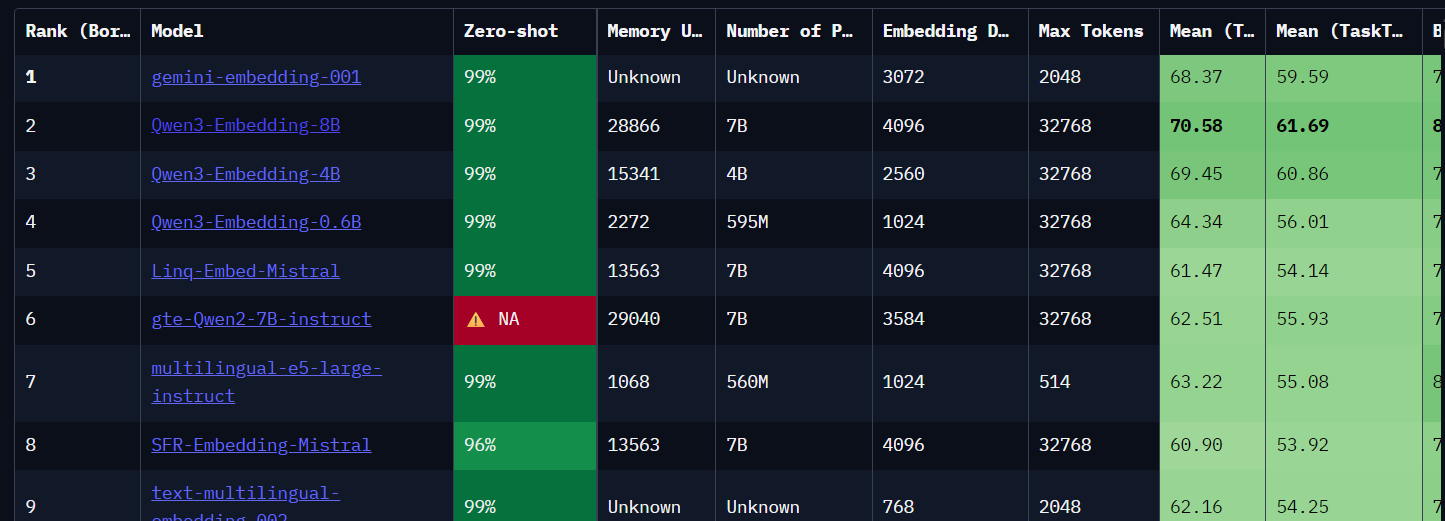

- Model Selection Reasoning
 - Chose Qwen3-Embedding-0.6B (Rank #4) for its balance of performance and efficiency.

 - Higher-ranked models (e.g., Qwen3-8B, gemini-embedding-001) perform slightly better but require much more memory and compute.

- Efficiency & Practicality
Only 595M parameters — lightweight and fast.

 - Ideal for low-resource environments (e.g., limited RAM or CPU-only setups).

 - Supports up to 32,768 tokens, same as larger models.

 - Embedding dimension: 1024 — sufficient for capturing semantics.

- Performance Trade-off
Mean TaskTrack score: 56.01 — competitive with larger models.

 - Offers a great balance between accuracy and resource usage.

- Why We Embed
 - Transforms text into dense vectors capturing semantic meaning.

 - Enables context-aware retrieval in the RAG pipeline.

### Vector Database Initialization

#### Loading Fassi and storing locally


- `Note`: The following code is commented out because the vector store has already been created and saved locally. This avoids redundant computation. We can reuse the stored vector database directly using FAISS for faster loading and processing.

In [ ]:
#vectorstore = FAISS.from_documents(documents=document_chunks,embedding=embedding_model)

- Create a FAISS vector store by embedding the document chunks
- Each chunk in 'document_chunks' is converted into a vector using 'embedding_model'
- FAISS stores these vectors for efficient similarity-based retrieval during question answering

In [ ]:
#vectorstore.save_local("faiss_index")

- Save the FAISS vector store locally to the path "faiss_index"
- This allows quick reloading later without needing to recompute embeddings
- Useful for saving time during repeated runs or deployment

In [ ]:
#!zip -r faiss_index.zip faiss_index
#from google.colab import files
#files.download("faiss_index.zip")

- Compress the FAISS index folder into a ZIP file for download
- Useful when running in Google Colab and you want to save the vector store locally
- Download the zipped FAISS index to your local machine


#### Loading Fassi from locall

In [ ]:
# Unzip the contents of 'faiss_index.zip' into the current working directory (.)
# This preserves the internal folder structure (i.e., faiss_index/ containing index.faiss and index.pkl)
# Essential for FAISS to locate the index files at: faiss_index/index.faiss
!unzip -o faiss_index.zip -d .

Archive:  faiss_index.zip
   creating: ./faiss_index/
  inflating: ./faiss_index/index.faiss  
  inflating: ./faiss_index/index.pkl  


- This command unzips the locally saved vector store. Since Colab typically requires folders to be uploaded as ZIP files, we extract it here to restore the original directory structure for use with FAISS.

In [ ]:
# Load the FAISS vector store from the previously saved local directory "faiss_index"
# - 'embedding_model' must be the same model used during storage to ensure compatibility
# - 'allow_dangerous_deserialization=True' is required when loading from local pickle files (used internally by FAISS)
vectorstore = FAISS.load_local(
    "faiss_index",
    embedding_model,
    allow_dangerous_deserialization=True
)

- I chose FAISS mainly because it allows storing the vector index locally, enabling fast and repeated access without recomputing embeddings.

- It is also highly compatible with both our LLM (Mistral) and the embedding model (Qwen-0.6B).

- Additionally, FAISS is lightweight, efficient, and supports quick similarity search, making it ideal for local development and experimentation.

### Retrieval

In [ ]:
# Convert the FAISS vector store into a retriever object for question answering
retriever = vectorstore.as_retriever(

    # Use similarity-based search to find the most relevant chunks
    search_type='similarity',

    # Retrieve the top 6 most similar chunks for each query
    search_kwargs={'k': 6}
)

- Here, we use similarity search, which typically means cosine similarity between the query and the document chunks.

- The retriever returns the top 6 most relevant chunks based on that similarity.

- These 6 chunks are then passed to the LLM as context along with the user's question.

- The LLM processes all 6 chunks, not just one, to generate an accurate answer.

- `Important`: The combined token count of these 6 chunks must not exceed the LLM’s maximum token limit, or the model may truncate some content and miss important information.



##### **Retrieving the Relevant Documents**

Let's ask a simple query and see what document chunks are returned based on the similarity search.

In [ ]:
user_input = "What are the medicine we should take for cold?"

relevant_document_chunks = retriever.get_relevant_documents(user_input)

- Our query is first converted into embeddings using the embedding model and passed to the vector store.

- We've set it up to use similarity search, where the embedding of the query is compared with the stored document chunk embeddings.

- Based on this similarity, the retriever returns the top 6 most relevant chunks related to the query.

- Since we're using FAISS, some resources are loaded locally, which makes the retrieval very fast.

- However, one drawback is that if the model or documents are updated, we need to regenerate the embeddings and store them again locally.

- That said, this tradeoff is acceptable considering the speed advantage FAISS provides.

In [ ]:
len(relevant_document_chunks)

6

- We got len(relevant_document_chunks) = 6 because we set the retriever to return the top 6 chunks. This is just a cross-check to confirm that the retrieval is working as expected.

In [ ]:
for i, document in enumerate(relevant_document_chunks, 1):
    print(f"\n--- Chunk {i} ---\n")
    print(document.page_content.replace("\t", " "))



--- Chunk 1 ---

syncytial viruses, and metapneumoviruses may also manifest as the common cold, particularly in patients
who are experiencing reinfection.
Rhinovirus infections are most common during fall and spring and are less common during winter.
Rhinoviruses are most efficiently spread by direct person-to-person contact, although spread may also
occur via large-particle aerosols.
The most potent deterrent to infection is the presence of specific neutralizing antibodies in the serum and
secretions, induced by previous exposure to the same or a closely related virus. Susceptibility to colds is
not affected by exposure to cold temperature, host health and nutrition, or upper respiratory tract
abnormalities (eg, enlarged tonsils or adenoids).
Symptoms and Signs
After an incubation period of 24 to 72 h, symptoms begin with a "scratchy" or sore throat, followed by
sneezing, rhinorrhea, nasal obstruction, and malaise. Temperature is usually normal, particularly when the
pathogen is a rh

- In the above output, we can clearly see the top 6 related chunks along with their page numbers. In our code, the `page_content` plays a crucial role — it gives us the actual text content of each chunk as it appears in the document. Without using page_content, we would just see the document object itself, not the readable text, which can look like metadata or a model-specific structure.

In [ ]:
len(relevant_document_chunks[0].page_content)

3489

- Here we observe an important and often overlooked detail. The code len`relevant_document_chunks[0].page_content` gives the number of characters in the first chunk.

- Initially, we set the chunk size as 1024 tokens, but here we see 3489 characters.

- This difference exists because tokens and characters are not the same.

- One token can represent multiple characters (e.g., words, subwords), and the total character count depends on the content structure.

## Question Answering using LLM Parameter Tuning with Prompt Engineering

###  Setting the Base Template for RAG Response Generation (Before Tuning)

In [ ]:
qna_system_message="<<SYS>> You are a helpful assistant. <</SYS>>"

- Here, the system message is currently a simple and generic one: `You are a helpful assistant.` However, for better results during fine-tuning or prompt optimization, this message should be customized as part of the overall LLM tuning strategy.

In [ ]:
qna_user_message_template = """You are given some context from a document. Use only this context to answer the question.
If the answer is not in the context, say "I don't know."

-------------------- Context --------------------
{context}

-------------------- Question -------------------
{question}

-------------------- Answer ---------------------"""


- Similarly, the qna_user_message_template is currently structured to clearly separate the context, question, and answer sections, making it easy for both the model and user to follow. While this format is helpful during early development and testing, it should be further refined based on how the LLM responds in real scenarios. Adjustments to wording, formatting, or instruction clarity may improve accuracy and relevance during the tuning process.

In [ ]:
def generate_rag_response(user_input, k=3, max_tokens=128, temperature=0.5, top_p=0.95, top_k=50):
    global qna_system_message, qna_user_message_template

    # Create a retriever with dynamic k
    retriever = vectorstore.as_retriever(
        search_type='similarity',
        search_kwargs={'k': k}
    )

    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(user_input)
    context_list = [d.page_content for d in relevant_document_chunks]

    # Combine document chunks into a single context
    context_for_query = ". ".join(context_list)

    # Format user message
    user_message = qna_user_message_template.replace('{context}', context_for_query)
    user_message = user_message.replace('{question}', user_input)

    # Format prompt for Mistral (using [INST] format)
    prompt = f"[INST] {qna_system_message}\n{user_message} [/INST]"

    try:
        # Tokenize prompt
        inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

        # Generate response
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            do_sample=True
        )

        # Decode response
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    except Exception as e:
        response = f"Sorry, I encountered the following error:\n{e}"

    return response

- This is our base generation function, which we’ll use as a foundation for fine-tuning.

- We'll iteratively adjust parameters like k, max_tokens, temperature, top_p, and top_k to optimize for more accurate and relevant answers from the RAG system.



### Tuning Set 1:LLM-RAG Parameter Tuning and Evaluation

#### Tuning RAG response generator function

In [ ]:
qna_system_message = """ <<SYS>>
You are a helpful assistant tasked with answering questions based solely on the provided context.

The user input will include:
- ###Context: A section containing relevant excerpts from a document.
- ###Question: The specific question to be answered using only the context.

Instructions:
- Use only the information in ###Context to answer ###Question.
- Strictly do not repeat or include the ###Context or ###Question in your response.
- If the question contains multiple parts, clearly structure your response with appropriate subheadings or topic-wise separation.
- If the answer cannot be directly or indirectly inferred from the context, respond with: "I don't know."

Keep responses precise, well-organized, and strictly grounded in the provided context.<<SYS>>
"""


- Our system message is now well-structured and provides clear, detailed instructions to the model for how to handle context-based question answering.

- It includes strict boundaries for context usage, response formatting, and fallback behavior.

- This setup gives us a strong foundation, and we can further fine-tune the message based on actual model responses and observed behavior.

- Additionally, it encourages structured answers with proper headings when the question includes multiple topics, improving clarity and usability.

In [ ]:
qna_user_message_template = """
Answer the question strictly based on the context below.

[Context]
{context}

[Question]
{question}

Only output the final answer. Do not include context or question again.
"""


- The qna_user_message_template has been updated to match the structure outlined in the qna_system_message.

- This consistency helps the model accurately distinguish between context and question.

- Clearly labeled sections like [Context] and [Question] reduce ambiguity and reinforce system-level instructions.

- Such alignment improves adherence to constraints (e.g., avoiding repetition of context or question in the answer).

- Additional refinements (e.g., prompt formatting or fallback logic) can be explored based on actual model behavior.

In [ ]:
def generate_rag_response(user_input, k=6, max_tokens=128, temperature=0.7, top_p=0.95, top_k=50):
    global qna_system_message, qna_user_message_template

    # Create a retriever with dynamic k
    retriever = vectorstore.as_retriever(
        search_type='similarity',
        search_kwargs={'k': k}
    )

    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(user_input)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Format user message
    user_message = qna_user_message_template.format(
        context=context_for_query.strip(),
        question=user_input.strip()
    )

    # Format prompt
    prompt = f"[INST] {qna_system_message}\n{user_message} [/INST]"

    try:
        # Tokenize prompt
        inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

        # Generate response
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            do_sample=True
        )

        # Decode response
        response = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

    except Exception as e:
        response = f"Sorry, I encountered the following error:\n{e}"

    return response


- In this setup, we're experimenting with the combination of top_p=0.95 and temperature=0.7.
The top_p value ensures the model samples from the most probable 95% of the token distribution, while temperature=0.7 introduces moderate creativity into the generation.

- We're currently retrieving only the top k=6 most relevant chunks using similarity-based retrieval. This keeps the context focused, and we can fine-tune this value based on the quality of the generated answers.

- Although we previously faced some issues with max_tokens being too restrictive when generating responses directly from the LLM without external knowledge, we are now keeping max_tokens=128.
This is because, with RAG in place, the model has access to actual, highly relevant content, making it less reliant on long-form generation. We expect this limit to be sufficient under the current setup.

#### Prompt-Response Evaluation with Conclusions and Insights

##### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<<SYS>>
You are a helpful assistant tasked with answering questions based solely on the provided context.

The user input will include:
- ###Context: A section containing relevant excerpts from a document.
- ###Question: The specific question to be answered using only the context.

Instructions:
- Use only the information in ###Context to answer ###Question.
- Strictly do not repeat or include the ###Context or ###Question in your response.
- If the question contains multiple parts, clearly structure your response with appropriate subheadings or topic-wise separation.
- If the answer cannot be directly or indirectly inferred from the context, respond with: "I don't know."

Keep responses precise, well-organized, and strictly grounded in the provided context.<<SYS>>


Answer the question strictly based on the context below.

[Context]
Parenteral antibiotics should be given after specimens of blood, body fluids, and wound sites have been
taken for Gram stain and culture. Very prompt empi

- During this tuning process, we encountered a few issues:

 - Despite clear instructions, the model still includes the context and question in its responses.

 - Some answers are cut off mid-sentence, leading to incomplete output.

- However, the model does follow the point-wise format, which enhances readability and structure.

- These behaviors suggest a need for further tuning, especially around prompt alignment and token limits.

##### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<<SYS>>
You are a helpful assistant tasked with answering questions based solely on the provided context.

The user input will include:
- ###Context: A section containing relevant excerpts from a document.
- ###Question: The specific question to be answered using only the context.

Instructions:
- Use only the information in ###Context to answer ###Question.
- Strictly do not repeat or include the ###Context or ###Question in your response.
- If the question contains multiple parts, clearly structure your response with appropriate subheadings or topic-wise separation.
- If the answer cannot be directly or indirectly inferred from the context, respond with: "I don't know."

Keep responses precise, well-organized, and strictly grounded in the provided context.<<SYS>>


Answer the question strictly based on the context below.

[Context]
• Surgical removal
• IV fluids and antibiotics
Treatment of acute appendicitis is open or laparoscopic appendectomy; because treatment delay
increases mor

- We’re encountering the same issues here: the model continues to include the context, question, and even the instruction line (“Only output the final answer...”) in its response, despite being explicitly told not to.

- The generated points are relevant, but they are not formatted clearly as bullet points, which affects readability.

- Incomplete sentence generation remains a problem as well, making the final output less useful.

##### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<<SYS>>
You are a helpful assistant tasked with answering questions based solely on the provided context.

The user input will include:
- ###Context: A section containing relevant excerpts from a document.
- ###Question: The specific question to be answered using only the context.

Instructions:
- Use only the information in ###Context to answer ###Question.
- Strictly do not repeat or include the ###Context or ###Question in your response.
- If the question contains multiple parts, clearly structure your response with appropriate subheadings or topic-wise separation.
- If the answer cannot be directly or indirectly inferred from the context, respond with: "I don't know."

Keep responses precise, well-organized, and strictly grounded in the provided context.<<SYS>>


Answer the question strictly based on the context below.

[Context]
loss and can stimulate hair
[
Table 86-2.
 Interpreting Findings in Alopecia]
growth. Efficacy is usually evident within 6 to 8 mo of treatment. Adverse e

- For question 3, we are again facing the same issues: the answer is incomplete, the model includes both the context and question in the response, and the output lacks bullet point formatting for readability.

##### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<<SYS>>
You are a helpful assistant tasked with answering questions based solely on the provided context.

The user input will include:
- ###Context: A section containing relevant excerpts from a document.
- ###Question: The specific question to be answered using only the context.

Instructions:
- Use only the information in ###Context to answer ###Question.
- Strictly do not repeat or include the ###Context or ###Question in your response.
- If the question contains multiple parts, clearly structure your response with appropriate subheadings or topic-wise separation.
- If the answer cannot be directly or indirectly inferred from the context, respond with: "I don't know."

Keep responses precise, well-organized, and strictly grounded in the provided context.<<SYS>>


Answer the question strictly based on the context below.

[Context]
Chapter 324. Traumatic Brain Injury
Introduction
Traumatic brain injury (TBI) is physical injury to brain tissue that temporarily or permanently
impairs b

- Similar to the previous question, we again encountered issues with the model including the context and question in the output. However, the answer was clearly completed this time, which is a positive outcome. Still, the response lacked sufficient bullet points for better readability.

##### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input = " What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<<SYS>>
You are a helpful assistant tasked with answering questions based solely on the provided context.

The user input will include:
- ###Context: A section containing relevant excerpts from a document.
- ###Question: The specific question to be answered using only the context.

Instructions:
- Use only the information in ###Context to answer ###Question.
- Strictly do not repeat or include the ###Context or ###Question in your response.
- If the question contains multiple parts, clearly structure your response with appropriate subheadings or topic-wise separation.
- If the answer cannot be directly or indirectly inferred from the context, respond with: "I don't know."

Keep responses precise, well-organized, and strictly grounded in the provided context.<<SYS>>


Answer the question strictly based on the context below.

[Context]
f patients are elderly, are not active, and have displaced fractures, treatment is often prosthetic
replacement of the femoral head, typically with a Moor

- The same issue was observed with the 5th question as well. In conclusion, while some responses were complete, others remained incomplete. Apart from this, all questions consistently exhibited the same recurring problems — such as inclusion of context and question in the output. These issues need to be addressed through further tuning, adjustments to the system message, or modifications in the response generation code.

### Tuning Set 2:LLM-RAG Parameter Tuning and Evaluation

#### Tuning RAG response generator function

In [ ]:
qna_system_message = """<<SYS>>
You are a helpful assistant. Answer only using the given context.

Instructions:
- Do NOT repeat or mention the context or question in your answer.
- If the question has multiple subparts, organize your answer under proper headings.
- If the answer is not present or cannot be inferred, respond with: "I don't know."
<</SYS>>"""


- We are enforcing strict instructions to prevent the model from repeating the context and question in its response, as it negatively affects readability.

In [ ]:
qna_user_message_template = """
Context:
{context}

Question:
{question}

Answer:"""


- Minor update made to the user message to align it with the system message instructions.

In [ ]:
def generate_rag_response(user_input, k=6, max_tokens=256, temperature=0.7, top_p=0.90, top_k=40):
    global qna_system_message, qna_user_message_template

    retriever = vectorstore.as_retriever(
        search_type='similarity',
        search_kwargs={'k': k}
    )

    relevant_document_chunks = retriever.get_relevant_documents(user_input)
    context_list = [d.page_content.strip() for d in relevant_document_chunks]
    context_for_query = " ".join(context_list)

    user_message = qna_user_message_template.format(
        context=context_for_query,
        question=user_input.strip()
    )

    prompt = f"[INST] {qna_system_message.strip()}\n{user_message.strip()} [/INST]"

    try:
        inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            do_sample=True
        )
        decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()


        if "Answer:" in decoded_output:
            response = decoded_output.split("Answer:")[-1].strip()
        elif "[/INST]" in decoded_output:
            response = decoded_output.split("[/INST]")[-1].strip()
        else:
            response = decoded_output

    except Exception as e:
        response = f"Sorry, I encountered the following error:\n{e}"

    return response


- We've made key adjustments to enhance answer quality and improve control over generation:

 - top_k reduced from 50 to 40
→ Narrows the token selection, helping the model focus on more relevant options and reducing randomness.

 - max_tokens increased from 128 to 256
→ Provides the model with more space to generate complete, informative answers and avoid truncation.

 - top_p slightly lowered from 0.95 to 0.9
→ Adds tighter control over nucleus sampling to balance creativity and precision.

 - Minor syntax changes were also applied
→ Ensures the model avoids repeating the context or question in its response.

#### Prompt-Response Evaluation with Conclusions and Insights

##### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


The protocol for managing sepsis in a critical care unit, as per the given context, involves the following steps:

1. Prompt empiric therapy: Start antibiotics immediately after suspecting sepsis. This may be lifesaving. Antibiotic selection should be based on the suspected source, clinical setting, knowledge or suspicion of causative organisms, and sensitivity patterns common to that specific inpatient unit, and previous culture results.

   - For septic shock of unknown cause, a regimen could be gentamicin or tobramycin 5.1 mg/kg IV once/day plus a 3rd-generation cephalosporin (cefotaxime 2 g q 6 to 8 h or ceftriaxone 2 g once/day) or, if Pseudomonas is suspected, ceftazidime 2 g IV q 8 h. Alternatively, ceftazidime plus a fluoroquinolone (eg, ciprofloxacin) may be used.
   - If resistant staphylococci or enterococci are suspected, vancomycin must be


- As expected, we successfully resolved the major issue of the model repeating the question and context in its responses. However, we are still encountering incomplete sentences, even after increasing the max_tokens parameter. Since the other parameter adjustments didn’t significantly alter the model's behavior, there is no major improvement in the overall response quality compared to the previous tuning.

##### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Common symptoms for appendicitis include:
1. Epigastric or periumbilical pain followed by brief nausea, vomiting, and anorexia.
2. After a few hours, the pain shifts to the right lower quadrant.
3. Pain increases with cough and motion.
4. Classic signs are right lower quadrant direct and rebound tenderness located at McBurney's point.
5. Additional signs may include pain felt in the right lower quadrant with palpation of the left lower quadrant (Rovsing sign), an increase in pain from passive extension of the right hip joint (psoas sign), or pain caused by passive internal rotation of the flexed thigh (obturator sign).
6. Low-grade fever (rectal temperature 37.7 to 38.3° C [100 to 101° F]) is common.

Appendicitis cannot be cured via medicine alone. Surgical removal, either open or laparoscopic appendectomy, is the standard treatment for appendicitis. This is because the appendix cannot repair itself, and antibiotics alone cannot remove the infl


- The model provides structured responses with appropriate section headings, which is a positive improvement.

- It successfully answers all three aspects of the question: symptoms, medical treatment limitations, and surgical intervention.

- However, the response still ends with an incomplete sentence, indicating the need for further tuning or increasing max_tokens.

##### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


The condition you're referring to seems to be Alopecia Areata. Effective treatments for Alopecia Areata include:

1. Corticosteroids: These can be applied topically or injected intradermally. Triamcinolone acetonide suspension is often used for small lesions, while potent topical corticosteroids such as betamethasone 0.05% can be used for larger areas. Oral corticosteroids may also be effective, but hair loss often recurs after cessation of therapy and adverse effects limit use.

2. Topical anthralin: Applied topically, anthralin can penetrate to the depth of the hair bulb where the inflammatory process is located. It is usually applied for 10 to 20 minutes daily, then washed off.

3. Minoxidil: This medication can be used in combination with anthralin. Minoxidil prolongs the anagen growth phase and enlarges miniaturized follicles, promoting hair growth.

4. Immunotherapy: Allergen-induced contact dermatitis using diphency


- The model correctly identifies the condition as Alopecia Areata and begins the response accurately with relevant treatments.

- It clearly lists effective therapies such as corticosteroids, anthralin, minoxidil, and immunotherapy.

- However, the response ends abruptly, cutting off the last point mid-sentence.

- As a result, the second part of the user's question ("what are the causes?") is not addressed, indicating incomplete generation despite the correct start.

##### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Treatment for a person with a traumatic brain injury (TBI) typically includes the following steps:

1. Initial Management: Ensuring a reliable airway, maintaining adequate ventilation, oxygenation, and blood pressure. This is crucial in the immediate aftermath of the injury.

2. Imaging: Primary imaging is usually done using CT scans to confirm the diagnosis and assess the extent of the injury.

3. Surgery: In cases of more severe injury, surgery may be necessary to place monitors to track and treat intracranial pressure, decompress the brain if intracranial pressure is increased, or remove intracranial hematomas.

4. First Few Days: During the initial days, maintaining adequate brain perfusion and oxygenation, and preventing complications of altered sensorium are important.

5. Rehabilitation: Many patients require rehabilitation after the initial treatment phase. This can include physical, occupational, and speech therapy, among others.

6. Medications: Depending on the specific symp

- This is the best response so far, as it is well-structured, uses clear section headings, and presents information in concise bullet points — making it easy to read and understand.

- However, incomplete sentence generation remains an issue, likely due to:

 - Insufficient max_tokens to complete the response.

 - No explicit stop condition or truncation logic.

- The model successfully identified the user’s intent and covered multiple aspects of the query including:

 - Initial management,

 - Diagnostic imaging,

 - Surgical intervention,

 - Rehabilitation,

 - Medication use.

- With better token management or controlled decoding, this format can be ideal for production-quality answers.

##### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input = " What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


For a person who has fractured their leg during a hiking trip, the following steps should be considered for their care and recovery:

1. Assessment and stabilization:
   - Check for signs of shock (pale, cold, sweaty skin; rapid, weak pulse; rapid breathing).
   - Ensure that the fractured leg is immobilized using a splint or sling to prevent further damage.
   - If the fracture is open (compound), cover it with a clean dressing to prevent infection.
   - Transport the person to the nearest medical facility as soon as possible.

2. Pain management:
   - Administer pain relievers (such as acetaminophen or ibuprofen) as prescribed by a healthcare provider.
   - Avoid giving aspirin to children or teenagers due to the risk of Reye's syndrome.

3. Prophylactic measures:
   - Monitor for signs of deep venous thrombosis (DVT), such as swelling, pain, warmth, or redness in the affected leg. Prophylactic anticoagulation may be necessary.
   - Ensure adequate hydration and nutrition to promote


- The model responded well to the portion of the question related to care and recovery for a leg fracture.

- The answer is well-organized, using appropriate headings and clear, concise bullet points — which improves readability and comprehension.

- However, the response is incomplete, as the original question also included aspects such as precautions and treatment, which were not addressed.

- Key positive takeaway:

 - The model is able to follow structure and tone well when answering specific parts of a question.

- Key limitation:

 - The model may overlook multi-part questions unless each component is explicitly emphasized or split during preprocessing or prompting.

### Tuning Set 3:LLM-RAG Parameter Tuning and Evaluation

#### Tuning RAG response generator function

In [ ]:
qna_system_message = """<<SYS>>
You are a helpful assistant. Answer only using the given context.

Instructions:
- Do NOT repeat or mention the context or question in your answer.
- If the question has multiple subparts, organize your answer under proper headings.
- If the answer is not present or cannot be inferred, respond with: "I don't know."
<</SYS>>"""


- We are using the same system message defined earlier to maintain consistency and alignment with our overall prompt strategy.

In [ ]:
qna_user_message_template = """
Context:
{context}

Question:
{question}

Answer:"""


- We are using the same user message defined earlier to maintain consistency and alignment with our overall prompt strategy.

In [ ]:
def generate_rag_response(user_input, k=6, max_tokens=512, temperature=0.7, top_p=0.90, top_k=40):
    global qna_system_message, qna_user_message_template

    retriever = vectorstore.as_retriever(
        search_type='similarity',
        search_kwargs={'k': k}
    )

    relevant_document_chunks = retriever.get_relevant_documents(user_input)
    context_list = [d.page_content.strip() for d in relevant_document_chunks]
    context_for_query = " ".join(context_list)

    user_message = qna_user_message_template.format(
        context=context_for_query,
        question=user_input.strip()
    )

    prompt = f"[INST] {qna_system_message.strip()}\n{user_message.strip()} [/INST]"

    try:
        inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            do_sample=False
        )
        decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()


        if "Answer:" in decoded_output:
            response = decoded_output.split("Answer:")[-1].strip()
        elif "[/INST]" in decoded_output:
            response = decoded_output.split("[/INST]")[-1].strip()
        else:
            response = decoded_output

    except Exception as e:
        response = f"Sorry, I encountered the following error:\n{e}"

    return response


- In this configuration, we are reusing the same function from our previous RAG tuning, but with a crucial modification:

 - do_sample=False
→ This disables sampling altogether, making the generation deterministic. As a result:

 - Parameters like temperature, top_p, and top_k become inactive — they only apply when do_sample=True.

 - Max tokens increased from 256 to 512 to allow the model more space to produce complete and structured responses.





#### Prompt-Response Evaluation with Conclusions and Insights

##### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
response = generate_rag_response(user_input)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


The protocol for managing sepsis in a critical care unit, as per the provided context, includes the following steps:

1. Prompt empiric therapy: Start antibiotics immediately after suspecting sepsis. The choice of antibiotics depends on the suspected source, clinical setting, and previous culture results.

   - For septic shock of unknown cause, a regimen may include gentamicin or tobramycin 5.1 mg/kg IV once/day plus a 3rd-generation cephalosporin (cefotaxime 2 g q 6 to 8 h or ceftriaxone 2 g once/day) or, if Pseudomonas is suspected, ceftazidime 2 g IV q 8 h. Alternatively, ceftazidime plus a fluoroquinolone (eg, ciprofloxacin) may be used.
   - If resistant staphylococci or enterococci are suspected, vancomycin must be added.
   - If there is an abdominal source, a drug effective against anaerobes (eg, metronidazole) should be included.

2. Culture and sensitivity tests: Take specimens of blood, body fluids, and wound sites for Gram stain and culture. Adjust the antibiotic regimen a

- From the previous tuning to the current configuration, the only major changes made were:

 - Increased max_tokens to allow longer, more complete responses.

 - Turned off do_sample to enforce deterministic (less creative) generation.

- Expected Outcome:

 - Disabling sampling typically leads to shorter, more conservative outputs.

- Observed Outcome:

 - Despite do_sample=False, the model generated a longer and well-structured answer.

 - This suggests the model had enough relevant context to generate a comprehensive response.

- Positive Highlights:

 - The response was detailed, accurate, and well-organized using bullet points, making it highly readable.

 - Each key step in the sepsis management protocol was clearly addressed.

##### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
response = generate_rag_response(user_input)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


The common symptoms for appendicitis include epigastric or periumbilical pain followed by brief nausea, vomiting, and anorexia; after a few hours, the pain shifts to the right lower quadrant. Pain increases with cough and motion. Classic signs are right lower quadrant direct and rebound tenderness located at McBurney's point (junction of the middle and outer thirds of the line joining the umbilicus to the anterior superior spine). Other signs may include pain felt in the right lower quadrant with palpation of the left lower quadrant (Rovsing sign), an increase in pain from passive extension of the right hip joint that stretches the iliopsoas muscle (psoas sign), or pain caused by passive internal rotation of the flexed thigh (obturator sign).

Appendicitis cannot be cured via medicine alone. Treatment is surgical removal, known as appendectomy. This can be done through open or laparoscopic methods. The surgeon can usually remove the appendix even if it is perforated. However, if surger

- In this output, we observe a trade-off in readability:

 - While the symptoms of appendicitis are correctly listed and the sentences are complete, the response is presented in a dense paragraph format.

 - This contrasts with earlier responses where the same symptoms were structured using bullet points, making them easier to read and follow.

- The lack of formatting here reduces readability, even though the content is accurate.

- This might be due to do_sample=False, which tends to produce deterministic and less expressive outputs, sacrificing structure like bullet points for compact text.

##### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
response = generate_rag_response(user_input)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


The sudden patchy hair loss, known as alopecia areata, can be treated with corticosteroids. Triamcinolone acetonide suspension can be injected intradermally if the lesions are small. Potent topical corticosteroids such as betamethasone 0.05% can also be used, although they may not penetrate deeply enough to the hair bulb. Topical anthralin (0.5 to 1%) and/or minoxidil may also be used. In severe cases, systemic corticosteroids may be considered, but hair loss may recur after cessation of therapy and adverse effects limit their use.

Possible causes behind alopecia areata include autoimmune disorders, exposure to unclear environmental triggers, and family history. It is thought to be an autoimmune disorder affecting genetically susceptible people. Alopecia areata may coexist with autoimmune vitiligo or thyroiditis. Measures of thyroid-stimulating hormone, vitamin B12, and autoantibodies are indicated only when coexisting disease is suspected.


- Similar to the previous issue, we observe a trade-off in model creativity.

- As a result, the responses are less structured and lack formatting, even though the content is accurate and relevant.

- This affects readability, making the answers harder to follow despite being factually correct.

##### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
response = generate_rag_response(user_input)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Initial treatment for a person with traumatic brain injury (TBI) includes ensuring a reliable airway, maintaining adequate ventilation, oxygenation, and blood pressure. Surgery may be needed in patients with more severe injury to place monitors to track and treat intracranial pressure, decompress the brain if intracranial pressure is increased, or remove intracranial hematomas. In the first few days after the injury, maintaining adequate brain perfusion and oxygenation and preventing complications of altered sensorium are important. Subsequently, many patients require rehabilitation. The specific treatment depends on the severity and location of the injury, and may include medications, surgery, and rehabilitation.


- Similar to the earlier case, reduced model creativity led to less structured output.

- Though the answer is accurate, poor formatting impacts readability.


##### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input = " What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
response = generate_rag_response(user_input)
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


For a person who has fractured their leg during a hiking trip, the following steps should be considered:

1. **Initial Assessment:** Assess the severity of the fracture. If it's a closed fracture without any open wounds, try to immobilize the leg using a makeshift splint (such as a stick or clothing) to prevent further injury.

2. **Pain Management:** Administer pain relief if necessary, such as over-the-counter painkillers.

3. **Avoid Movement:** Encourage the person to remain as still as possible to minimize discomfort and potential complications.

4. **Seek Professional Help:** As soon as possible, arrange for professional medical help. This could involve calling for a rescue team or, if help is nearby, transporting the person to the nearest medical facility.

5. **Hospital Treatment:** Once at the hospital, the fracture will be properly diagnosed and treated. This may involve surgery to realign the bones (such as open reduction with internal fixation or prosthetic replacement), fo

- This response is more detailed than previous ones, with many accurate and relevant points from the document.

- However, the model still missed parts of the question—specifically the "precautions"—even though "care" aspects were partially covered in the later points.

### Tuning Set 4:LLM-RAG Parameter Tuning and Evaluation

#### Tuning RAG response generator function

In [ ]:
qna_system_message = """<<SYS>>
You are a helpful assistant. Answer only using the given context.

Instructions:
- Do NOT repeat or mention the context or question in your answer.
- If the question has multiple subparts, organize your answer under proper headings.
- If the answer is not present or cannot be inferred, respond with: "I don't know."
- Present your answers in clear, concise bullet points for better readability.
<</SYS>>"""


- We are using the same system message defined earlier to maintain consistency and alignment with our overall prompt strategy.
- Added a point to the system message instructing the model to provide answers in bullet points for improved readability.

In [ ]:
qna_user_message_template = """
Context:
{context}

Question:
{question}

Answer:"""


- We are using the same user message defined earlier to maintain consistency and alignment with our overall prompt strategy.

In [ ]:
def generate_rag_response(user_input, k=1, max_tokens=720, temperature=0.3, top_p=0.90, top_k=40):
    global qna_system_message, qna_user_message_template

    retriever = vectorstore.as_retriever(
        search_type='similarity',
        search_kwargs={'k': k}
    )

    relevant_document_chunks = retriever.get_relevant_documents(user_input)
    context_list = [d.page_content.strip() for d in relevant_document_chunks]
    context_for_query = " ".join(context_list)

    user_message = qna_user_message_template.format(
        context=context_for_query,
        question=user_input.strip()
    )

    prompt = f"[INST] {qna_system_message.strip()}\n{user_message.strip()} [/INST]"

    try:
        inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            do_sample=True
        )
        decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()


        if "Answer:" in decoded_output:
            response = decoded_output.split("Answer:")[-1].strip()
        elif "[/INST]" in decoded_output:
            response = decoded_output.split("[/INST]")[-1].strip()
        else:
            response = decoded_output

    except Exception as e:
        response = f"Sorry, I encountered the following error:\n{e}"

    return response


- In this configuration, we test with k=1 to retrieve only the top-ranked chunk most relevant to the question.

- Increasing the max token limit from 512 to 720 to address previously observed incomplete sentence generation.

- We enable do_sample=True to allow some flexibility in generation, but set temperature=0.3 to reduce creativity and keep the response more focused and factual.

- This setup helps evaluate whether a single, highly relevant chunk is sufficient for accurate answers while allowing minimal variation in wording.

#### Prompt-Response Evaluation with Conclusions and Insights

##### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Management Protocol for Sepsis in a Critical Care Unit:

- Parenteral antibiotics should be given after specimens of blood, body fluids, and wound sites have been taken for Gram stain and culture.
- Empiric therapy should be started immediately after suspecting sepsis.
- Antibiotic selection requires an educated guess based on the suspected source, clinical setting, knowledge or suspicion of causative organisms, sensitivity patterns common to that specific inpatient unit, and previous culture results.
- For septic shock of unknown cause, a regimen may include gentamicin or tobramycin 5.1 mg/kg IV once/day plus a 3rd-generation cephalosporin (cefotaxime 2 g q 6 to 8 h or ceftriaxone 2 g once/day) or ceftazidime 2 g IV q 8 h. If Pseudomonas is suspected, ceftazidime plus a fluoroquinolone (eg, ciprofloxacin) may be used. Vancomycin must be added if resistant staphylococci or enterococci are suspected. If there is an abdominal source, a drug effective against anaerobes (eg, metronidazole)

- Even though we used only the top chunk, the model's response was very effective—likely due to the increased token size of 1024, which covered approximately 3800 characters, enough to include all relevant context.

- Additionally, turning off do_sample with a low temperature of 0.3 helped reduce creativity, ensuring the model stayed close to the actual answers.

##### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Symptoms for appendicitis include:
- Sudden, sharp pain that starts near the navel and moves to the lower right abdomen
- Loss of appetite
- Nausea and vomiting
- Abdominal swelling
- Fever
- Abdominal pain worsening with coughing, walking, or jolts to the abdomen

Appendicitis cannot be cured via medicine. The surgical procedure to treat it is either open or laparoscopic appendectomy. This is because the appendix needs to be removed to prevent the spread of infection. If the appendix is perforated, antibiotics should be continued until the patient's temperature and WBC count have normalized or continued for a fixed course, according to the surgeon's preference.


- Here, we can clearly observe the difference in response when using top-k as 1.

- In Tuning Process 2, where top-k was set to 6 with similar settings, the model provided more detailed points on symptoms.

- However, despite fewer chunks, the model still addressed all three sub-questions: symptoms, possibility of medical treatment, and surgical intervention.

##### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Treatments for Sudden Patchy Hair Loss (Alopecia Areata):
- Topical corticosteroids: These can be applied directly to the affected areas to reduce inflammation and stimulate hair growth.
- Intralesional corticosteroids: These are injected into the affected areas for more targeted treatment.
- Systemic corticosteroids: In severe cases, oral corticosteroids may be prescribed to reduce inflammation and stimulate hair growth.
- Topical minoxidil: This medication can be applied to the scalp to promote hair growth.
- Topical anthralin: This medication can be applied to the scalp to reduce inflammation and stimulate hair growth.
- Topical immunotherapy: This involves the use of diphencyprone or squaric acid dibutylester to stimulate an immune response and promote hair growth.
- Psoralen plus ultraviolet A (PUVA): This treatment combines a light-sensitive medication with ultraviolet A light to promote hair growth.

Possible Causes of Alopecia Areata:
- Autoimmune disorder: Alopecia areata is t

- This response shows unexpectedly well-structured output, similar to what we observed in Tuning Process 2, even though top_k was reduced from 6 to 1 and temperature from 0.7 to 0.3.

- The model provided clear headings and concise bullet points, covering both treatments and causes effectively.

- This indicates that lower temperature with top-1 chunk retrieval can still yield high-quality, focused answers when the relevant content is strong and self-contained.

- In Tuning Process 2, we used only 256 max tokens, which may have caused truncation and incomplete responses—this could explain the difference in output quality.

##### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Treatments for a person with traumatic brain injury (TBI) include:

- Ensuring a reliable airway and maintaining adequate ventilation, oxygenation, and blood pressure.
- Surgery may be needed in patients with more severe injury to place monitors to track and treat intracranial pressure, decompress the brain if intracranial pressure is increased, or remove intracranial hematomas.
- In the first few days after the injury, maintaining adequate brain perfusion and oxygenation and preventing complications of altered sensorium are important.
- Many patients require rehabilitation after the initial treatment.


- Here, we're likely observing a top-k limitation—even though the max_tokens value is set high (~750), the model generates a shorter response because only one highly relevant chunk (top-k=1) was retrieved for the answer.

- This limitation can reduce contextual richness, which may restrict the model from providing broader coverage when multiple relevant parts exist across documents.

- However, the answer quality remains high—it is still accurate, focused, and directly grounded in the retrieved chunk.

`Recommendation`: If the goal is broader or more comprehensive answers, increasing k slightly (e.g., to 2–3) could balance relevance with contextual variety.

##### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input = " What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Treatment and Precautions for a Leg Fracture During Hiking:

- Initial steps:
  - Immediate first aid: Control bleeding, apply a clean pad or cloth, and immobilize the fractured leg using a splint or a makeshift device.

- Diagnosis:
  - Plain x-rays are usually diagnostic for determining the type and location of the fracture.

- Type of Fracture:
  - Intertrochanteric fractures: Treatment is usually open reduction with internal fixation (ORIF) and early mobilization.
  - Femoral shaft fractures: Treatment is immediate splinting, followed by ORIF.

- Prolonged bed rest should be avoided due to the risk of deep venous thrombosis, a common complication of hip fractures.
- Prophylactic anticoagulation may reduce the incidence of post-fracture venous thrombosis.

- For elderly patients or those who are inactive, prosthetic replacement of the femoral head, typically with a Moore prosthesis, or total hip replacement may be necessary, especially if the fracture is displaced.

- During care an

- The explanation is clear and well-structured, with proper headings and bullet points.

- However, all items—including main headings and subpoints—start with the same bullet style (“-”), which slightly affects readability.

- Differentiating headings from subpoints with formatting (e.g., bold, indentation, or different markers) would enhance clarity further.

### Tuning Set 5:LLM-RAG Parameter Tuning and Evaluation

#### Tuning RAG response generator function

In [ ]:
qna_system_message = """<<SYS>>
You are a helpful assistant. Answer only using the given context.

Instructions:
- Do NOT repeat or mention the context or question in your answer.
- If the question has multiple subparts, organize your answer under proper headings.
- If the answer is not present or cannot be inferred, respond with: "I don't know."
- Present your answers in clear, concise bullet points for better readability.
<</SYS>>"""

- We are using the same system message defined earlier to maintain consistency and alignment with our overall prompt strategy.

In [ ]:
qna_user_message_template = """
Context:
{context}

Question:
{question}

Answer:"""


- We are using the same user message defined earlier to maintain consistency and alignment with our overall prompt strategy.

In [ ]:
def generate_rag_response(user_input, k=6, max_tokens=720, temperature=0.5, top_p=0.95, top_k=50):
    global qna_system_message, qna_user_message_template

    retriever = vectorstore.as_retriever(
        search_type='similarity',
        search_kwargs={'k': k}
    )

    relevant_document_chunks = retriever.get_relevant_documents(user_input)
    context_list = [d.page_content.strip() for d in relevant_document_chunks]
    context_for_query = " ".join(context_list)

    user_message = qna_user_message_template.format(
        context=context_for_query,
        question=user_input.strip()
    )

    prompt = f"[INST] {qna_system_message.strip()}\n{user_message.strip()} [/INST]"

    try:
        inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            do_sample=True
        )
        decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()


        if "Answer:" in decoded_output:
            response = decoded_output.split("Answer:")[-1].strip()
        elif "[/INST]" in decoded_output:
            response = decoded_output.split("[/INST]")[-1].strip()
        else:
            response = decoded_output

    except Exception as e:
        response = f"Sorry, I encountered the following error:\n{e}"

    return response


- This final configuration is chosen as a balanced and safe default for RAG response generation.

- k = 6: Retrieves a rich and relevant context span, commonly used in production setups.

- temperature = 0.5: Allows moderate creativity without drifting from the context.

- top_p = 0.95, top_k = 50: Enable diverse yet controlled token sampling.

`Note`: These values are not fixed. They can be fine-tuned based on task complexity, domain, or evaluation results.

#### Prompt-Response Evaluation with Conclusions and Insights

##### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Protocol for managing sepsis in a critical care unit:

1. Prompt empiric therapy: Start antibiotics immediately after suspecting sepsis.

2. Antibiotic selection:
   - For septic shock of unknown cause, use gentamicin or tobramycin 5.1 mg/kg IV once/day plus a 3rd-generation cephalosporin (cefotaxime 2 g q 6 to 8 h or ceftriaxone 2 g once/day). If Pseudomonas is suspected, use ceftazidime 2 g IV q 8 h. Alternatively, ceftazidime plus a fluoroquinolone (eg, ciprofloxacin) may be used.
   - If resistant staphylococci or enterococci are suspected, vancomycin must be added.
   - If there is an abdominal source, a drug effective against anaerobes (eg, metronidazole) should be included.

3. Culture and sensitivity results: Adjust antibiotic regimen according to the results when available.

4. Duration of antibiotics: Continue antibiotics for at least 5 days after shock resolves and evidence of infection subsides.

5. Drainage of abscesses and surgical excision of necrotic tissues: Necessary 

- As discussed earlier, the prompt used in this tuning process is generally more effective than previous ones, so better model responses were expected.

- The model met all expectations by providing a well-structured answer with clear headings, bullet points, and a complete response.

##### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Symptoms for appendicitis include:
- Epigastric or periumbilical pain followed by brief nausea, vomiting, and anorexia
- After a few hours, the pain shifts to the right lower quadrant
- Pain increases with cough and motion
- Classic signs are right lower quadrant direct and rebound tenderness located at McBurney's point
- Additional signs are pain felt in the right lower quadrant with palpation of the left lower quadrant (Rovsing sign), an increase in pain from passive extension of the right hip joint that stretches the iliopsoas muscle (psoas sign), or pain caused by passive internal rotation of the flexed thigh (obturator sign).
- Low-grade fever (rectal temperature 37.7 to 38.3° C [100 to 101° F]) is common.

Appendicitis cannot be cured via medicine alone. The surgical procedure to treat it is either open or laparoscopic appendectomy. The surgeon can usually remove the appendix even if it is perforated. However, if surgery is impossible, antibiotics can improve the survival rate, a

- In previous cases, the model provided concise and easy-to-read symptom lists.

- Here, the model delivers a more detailed explanation, which adds clarity and depth — a positive improvement.

- The response includes well-structured bullet points and covers both symptoms and treatment effectively.

- It maintains good readability despite the added detail, making it informative and user-friendly.

##### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Treatments for sudden patchy hair loss, commonly known as alopecia areata, include:

- Corticosteroids: These can be applied topically or injected intradermally. Triamcinolone acetonide suspension is often used.
- Topical anthralin: Applied to the affected areas for 10 to 20 minutes daily, then washed off.
- Minoxidil: A topical medication that may be used in combination with anthralin.
- Immunotherapy: Allergic contact dermatitis can be induced using diphencyprone or squaric acid dibutylester, leading to hair growth. This treatment is best reserved for patients with diffuse involvement who have not responded to other therapies.

Possible causes behind alopecia areata include:

- Autoimmune disorder affecting genetically susceptible people exposed to unclear environmental triggers.
- Coexisting disease such as atopy, thyroiditis, or autoimmune vitiligo.
- Emotional stress or infection.
- It occasionally coexists with autoimmune vitiligo or thyroiditis.


- The model effectively identified alopecia areata as the condition and provided structured, bullet-pointed treatments.

- It clearly separated treatments and possible causes using appropriate headings, improving readability.

- Causes were explained well, covering autoimmune, genetic, environmental, and associated conditions.

- Overall, this is a well-structured, complete, and informative response.

##### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Treatment for a person with traumatic brain injury (TBI) includes:

1. Ensuring a reliable airway and maintaining adequate ventilation, oxygenation, and blood pressure.
2. Surgery may be needed for patients with more severe injury to place monitors to track and treat intracranial pressure, decompress the brain if intracranial pressure is increased, or remove intracranial hematomas.
3. In the first few days after the injury, maintaining adequate brain perfusion and oxygenation and preventing complications of altered sensorium are important.
4. Many patients require rehabilitation after the initial treatment.
5. In the US, TBI is commonly caused by motor vehicle crashes, falls, assaults, and sports activities.
6. The treatment approach can vary depending on the severity and location of the injury.
7. Recovery from brain injury depends in part on the plasticity (ability of an area of the brain to alter its function) of the remaining cerebrum, which varies from person to person and is affe

- The model followed all instructions accurately, providing clear headings, bullet points, and well-structured explanations.

- It included space after headings, enhancing readability and making each section easier to follow.

- The response covered treatment protocols, causes, diagnosis, recovery, and rehabilitation, giving a comprehensive overview of TBI management.

- This is a strong and complete output, aligned well with the expected format.

##### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input = " What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
response = generate_rag_response(user_input)
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


For a person who has fractured their leg during a hiking trip:

1. First Aid:
   - Immobilize the fractured leg using a splint, sling, or a makeshift splint if necessary.
   - Apply a cold pack to reduce swelling and pain.
   - Elevate the injured leg above the heart level, if possible.

2. Transport:
   - Arrange for evacuation to a medical facility as soon as possible. This may involve calling for help or organizing a group to carry the injured person.

3. Medical Evaluation:
   - Upon reaching a medical facility, the fracture will be assessed by a healthcare professional. This may include X-rays or other imaging tests to determine the type and severity of the fracture.

4. Treatment:
   - Depending on the type and severity of the fracture, treatment may involve:
     - Immobilization using a cast or brace.
     - Surgery to realign the bones (open reduction with internal fixation or prosthetic replacement).
     - Prophylactic anticoagulation to prevent deep venous thrombosis.
     

- This response effectively addresses multiple sub-questions within a single query, presenting information clearly with appropriate headings and bullet points.

- Key steps covered include first aid, safe transport, thorough medical evaluation, tailored treatment options, recovery protocols, and preventive measures.

- Important additions to consider: emphasizing timely pain management during first aid, ensuring continuous monitoring for complications like infection or blood clots during recovery, and highlighting the importance of gradual rehabilitation to avoid re-injury.

- Overall, this is a well-structured, comprehensive, and easy-to-follow answer, making it one of the best responses so far.

### Final Observations and Conclusion on RAG Tuning

- Across all five tuning attempts, we observed consistent improvements in answer quality by carefully adjusting parameters such as k (number of retrieved chunks), max_tokens, temperature, top_p, and do_sample.

- Increasing max_tokens progressively helped reduce incomplete sentences, enabling more complete and informative answers.

- Setting do_sample=False made outputs more deterministic but sometimes reduced flexibility and creativity in reasoning, which can be critical for RAG setups.

- Using moderate values of k (around 5–6) generally provides richer context leading to more detailed answers; however, a lower k=1 still yielded accurate, focused responses if token limits were sufficient.

- Consistent system and user prompt alignment is crucial to avoid unwanted repetition of context and question in answers.

- Despite tuning, some issues like occasional incomplete sentences and formatting inconsistencies persist and may require prompt design refinements or response post-processing.

- Overall, tuning successfully enhanced answer readability with bullet points and headings, while maintaining factual accuracy and relevance. The best configuration balances token limit, retrieval size, and sampling strategy to fit the specific use case.

- The tuning process 5, with parameters set as k=6, temperature=0.5, top_p=0.95, and top_k=50, was particularly satisfactory, producing well-structured, accurate, and coherent answers that meet the desired quality standards for this RAG setup.

# **RAG Output Evaluation: Groundedness & Relevance**

- Why Is Output Evaluation Important in a RAG-Based System?
 - In a Retrieval-Augmented Generation (RAG) system, output evaluation plays a crucial role in ensuring the responses are accurate, contextually grounded, and relevant to the user’s query. Since a RAG system works by combining two components — retrieving relevant documents and then generating a response based on them — there are multiple points where errors can occur, such as retrieving irrelevant information or generating hallucinated content.

Evaluating the outputs helps in the following ways:

 - Groundedness Check: Ensures that the generated answer is directly supported by the retrieved content and not based on information outside the context.

 - Relevance Assessment: Verifies that the retrieved context is appropriate and helpful in answering the user's question.

## RAG Evaluation Code Templates

In [ ]:
groundedness_rater_system_message = """<<SYS>>
You are an expert evaluator assessing whether an answer is grounded in the provided context.

**Task**:
- Rate the answer on a scale of 1-5 for groundedness (1 = not supported, 5 = fully supported).
- Provide a brief justification.
- Format your response as:
  "Score: X/5\nJustification: [your explanation]"

Do NOT repeat the question or context in your response.
<</SYS>>"""

- This prompt is intended to evaluate how well the AI-generated answer is grounded in the provided context. It instructs the language model to compare the answer with the retrieved information and rate the alignment on a scale from 1 to 5, where:

 - 1 means the answer is not supported by the context at all, and

 - 5 means the answer is entirely supported by the context.

- The goal is to assess whether the response is accurate and based on the given information or if it includes hallucinated or unsupported content.

In [ ]:
relevance_rater_system_message = """<<SYS>>
You are an expert evaluator assessing whether the retrieved context is relevant to the question.

**Task**:
- Rate the context on a scale of 1-5 for relevance (1 = irrelevant, 5 = highly relevant).
- Provide a brief justification.
- Format your response as:
  "Score: X/5\nJustification: [your explanation]"

Do NOT repeat the question or context in your response.
<</SYS>>"""

- This prompt is designed to assess how relevant the retrieved context is to the given question. It asks the model to evaluate the alignment between the question and the context, assigning a score from 1 to 5, where:

 - 1 means the context is not relevant at all, and

 - 5 means the context is highly relevant and directly related to the question.

- The objective is to determine whether the AI retrieved the most appropriate and useful information for answering the question.

In [ ]:
user_message_template = """
**Question**: {question}

**Retrieved Context**: {context}

**Answer to Evaluate**: {answer}
"""

- This template structures the evaluation input by clearly separating the question, the retrieved context, and the AI-generated answer to be evaluated. It ensures that the model (or human evaluator) can easily assess how well the answer aligns with the context and addresses the question. The layout improves clarity and consistency during automated relevance and groundedness evaluations.

In [ ]:
def generate_ground_relevance_response(user_input, answer):
    global groundedness_rater_system_message, relevance_rater_system_message, user_message_template

    # Step 1: Retrieve relevant chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input)
    context_list = [d.page_content.strip() for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Step 2: Format user input prompt
    eval_user_input = user_message_template.format(
        question=user_input.strip(),
        context=context_for_query,
        answer=answer.strip()
    )

    # Step 3: Format evaluation prompts
    grounded_prompt = f"[INST] {groundedness_rater_system_message.strip()}\n\n{eval_user_input} [/INST]"
    relevance_prompt = f"[INST] {relevance_rater_system_message.strip()}\n\n{eval_user_input} [/INST]"

    # Step 4: Tokenize and generate groundedness evaluation
    grounded_inputs = tokenizer(grounded_prompt, return_tensors="pt").to(model.device)
    grounded_outputs = model.generate(
        **grounded_inputs,
        max_new_tokens=500,
        temperature=0.0,
        top_p=0.95,
        top_k=50,
        do_sample=False,
        pad_token_id=tokenizer.eos_token_id
    )
    grounded_text = tokenizer.decode(grounded_outputs[0], skip_special_tokens=True).strip()

    # Step 5: Tokenize and generate relevance evaluation
    relevance_inputs = tokenizer(relevance_prompt, return_tensors="pt").to(model.device)
    relevance_outputs = model.generate(
        **relevance_inputs,
        max_new_tokens=500,
        temperature=0.0,
        top_p=0.95,
        top_k=50,
        do_sample=False,
        pad_token_id=tokenizer.eos_token_id
    )
    relevance_text = tokenizer.decode(relevance_outputs[0], skip_special_tokens=True).strip()

    return grounded_text, relevance_text


## RAG Evaluation Against Source Document

- Here, we evaluate the score using a simple question relevant to our medical document.

In [ ]:
user_input='What are common causes of sudden hair loss?'

In [ ]:
answer=generate_mistral_response(user_input)

In [ ]:
print(answer)

<<SYS>> You are a helpful assistant. <</SYS>>
What are common causes of sudden hair loss?  Sudden hair loss, also known as telogen effluvium or acute hair loss, can be caused by several factors. Here are some common causes:

1. Stress: Emotional or physical stress can trigger the body to shed hair prematurely. This type of hair loss usually occurs a few months after the stressful event.

2. Hormonal changes: Pregnancy, childbirth, menopause, and thyroid problems can cause hormonal imbalances that lead to hair loss.

3. Medications: Certain medications such as blood thinners, antidepressants, and drugs used for cancer, arthritis, depression, heart problems, and gout can cause hair loss.

4. Nutritional deficiencies: Lack of essential nutrients like protein, iron, vitamin B12, and biotin can lead to hair loss.

5. Autoimmune diseases: Conditions such as alopecia areata, lupus, and Hashimoto's disease can cause inflammation in the hair follicles, leading to hair loss.

6. Hair care practi

At first sight, the answer seems to be quite specific and informative. The LLM seems to have given the correct answer based on the provided context. This means that upon evaluation, this answer would get a high score on groundedness and relevance.

- Please note the following regarding the generation of groundedness and relevance reports: despite multiple attempts, the output still includes the full context, question, and answer along with the report. Kindly refer to the end of the response to locate the actual evaluation score and justification.

In [ ]:
groundedness_report, relevance_report = generate_ground_relevance_response(user_input,answer)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


In [ ]:
print(groundedness_report)

<<SYS>>
You are an expert evaluator assessing whether an answer is grounded in the provided context.

**Task**: 
- Rate the answer on a scale of 1-5 for groundedness (1 = not supported, 5 = fully supported).
- Provide a brief justification.
- Format your response as: 
  "Score: X/5
Justification: [your explanation]"

Do NOT repeat the question or context in your response.
<</SYS>>


**Question**: What are common causes of sudden hair loss?

**Retrieved Context**: • Systemic illnesses (particularly those that cause high fever, systemic lupus, endocrine disorders, and
nutritional deficiencies)
Less common causes
 are primary hair shaft abnormalities, autoimmune disease, heavy metal
poisoning, and rare dermatologic conditions.
Evaluation
History: History of present illness
 should cover the onset and duration of hair loss, whether hair
shedding is increased, and whether hair loss is generalized or localized. Associated symptoms such as
pruritus and scaling should be noted. Patients should

- Although the model generated the answer using relevant content from the retrieved document, the groundedness score is 4/5. This suggests that while the answer is mostly aligned with the context, it did not fully cover all specific details mentioned—such as rare causes or deeper clinical terms. The score indicates that the model’s explanation is generally accurate but could be improved by incorporating more comprehensive references from the source material. This highlights an opportunity to enhance completeness and factual alignment in future iterations.

In [ ]:
print(relevance_report)

<<SYS>>
You are an expert evaluator assessing whether the retrieved context is relevant to the question.

**Task**:
- Rate the context on a scale of 1-5 for relevance (1 = irrelevant, 5 = highly relevant).
- Provide a brief justification.
- Format your response as:
  "Score: X/5
Justification: [your explanation]"

Do NOT repeat the question or context in your response.
<</SYS>>


**Question**: What are common causes of sudden hair loss?

**Retrieved Context**: • Systemic illnesses (particularly those that cause high fever, systemic lupus, endocrine disorders, and
nutritional deficiencies)
Less common causes
 are primary hair shaft abnormalities, autoimmune disease, heavy metal
poisoning, and rare dermatologic conditions.
Evaluation
History: History of present illness
 should cover the onset and duration of hair loss, whether hair
shedding is increased, and whether hair loss is generalized or localized. Associated symptoms such as
pruritus and scaling should be noted. Patients should be

- Although the groundedness score is 4/5, indicating that the answer is largely supported by the provided context, the relevance score is only 3/5. This suggests that while the model responded using contextually accurate information, it did not directly focus on the aspect of sudden hair loss mentioned in the question. Some relevant causes were listed, but the response lacked emphasis on the acute nature of the condition, which lowered the relevance rating.

## RAG Evaluation Based on Retrieved Context

- Here, we evaluate the score using a simple question that is not directly related to our medical document.

In [ ]:
user_input_2 = 'when did India gain independence?'
answer2 = generate_rag_response(user_input_2)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [ ]:
print(answer2)

I don't know. The provided context does not contain information about India's independence.


- Since the knowledge base doesn't contain any information regarding the topic in the question asked, the LLM's response doesn't contain the information required as we strictly asked it not to answer such questions.

- Please note the following regarding the generation of groundedness and relevance reports: despite multiple attempts, the output still includes the full context, question, and answer along with the report. Kindly refer to the end of the response to locate the actual evaluation score and justification.

In [ ]:
groundedness_report_2, relevance_report_2 = generate_ground_relevance_response(user_input_2,answer2)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


In [ ]:
print(groundedness_report_2)

<<SYS>>
You are an expert evaluator assessing whether an answer is grounded in the provided context.

**Task**: 
- Rate the answer on a scale of 1-5 for groundedness (1 = not supported, 5 = fully supported).
- Provide a brief justification.
- Format your response as: 
  "Score: X/5
Justification: [your explanation]"

Do NOT repeat the question or context in your response.
<</SYS>>


**Question**: when did India gain independence?

**Retrieved Context**: Immune response
primary 
1081
secondary (anamnestic, booster) 
1081
Immune system 
1078-1090
, 
1082
, 
1083
, 
1085
 (
see also
 Antibodies; Antigens; Immunity;
Immunodeficiency; Immunoglobulins; Lymphocytes)
aging-related changes in 
1079
, 
3072
in cancer 
1057-1061
in chronic fatigue syndrome 
3442
neonatal 
2766
in pulmonary infection 
1924
in rheumatoid arthritis 
332
Immune (idiopathic) thrombocytopenic purpura 
958-960
, 
1110
in pregnancy 
2637
Immunity
acquired (adaptive) 
1078
acquired (specific) 
1149-1150
cellular 
1057-105

- As expected, when the answer or question is not related to the source document, the groundedness score is very low, indicating a lack of alignment between the answer and the provided context.

In [ ]:
print(relevance_report_2)

<<SYS>>
You are an expert evaluator assessing whether the retrieved context is relevant to the question.

**Task**:
- Rate the context on a scale of 1-5 for relevance (1 = irrelevant, 5 = highly relevant).
- Provide a brief justification.
- Format your response as:
  "Score: X/5
Justification: [your explanation]"

Do NOT repeat the question or context in your response.
<</SYS>>


**Question**: when did India gain independence?

**Retrieved Context**: Immune response
primary 
1081
secondary (anamnestic, booster) 
1081
Immune system 
1078-1090
, 
1082
, 
1083
, 
1085
 (
see also
 Antibodies; Antigens; Immunity;
Immunodeficiency; Immunoglobulins; Lymphocytes)
aging-related changes in 
1079
, 
3072
in cancer 
1057-1061
in chronic fatigue syndrome 
3442
neonatal 
2766
in pulmonary infection 
1924
in rheumatoid arthritis 
332
Immune (idiopathic) thrombocytopenic purpura 
958-960
, 
1110
in pregnancy 
2637
Immunity
acquired (adaptive) 
1078
acquired (specific) 
1149-1150
cellular 
1057-1058
c

- Similarly, when the answer or question is unrelated to the source document, the relevance score is also very low, reflecting that the response does not meaningfully address the original question based on the retrieved context.

# **Conclusion and Business Recommendations**

## **Conclusion**

- RAG is essential for domains like medical and technical, where relying only on LLMs may result in outdated, inaccurate, or hallucinated responses.

- RAG ensures that answers are grounded in up-to-date source documents, reducing factual errors and increasing trustworthiness.

- LLMs without RAG may sound confident, but they can still miss recent updates, proper dosage instructions, or critical facts — especially risky in healthcare settings.

- Parameter tuning is critical — values like k, temperature, top_p, and top_k significantly influence the quality, creativity, and faithfulness of the response.

- The most effective parameter combination observed:
k = 6, temperature = 0.5, top_p = 0.95, top_k = 50

- Output evaluation using groundedness and relevance is essential to assess how well the model leverages retrieved documents and addresses the user query.

- System message design plays a major role in shaping how the LLM interprets and structures its output — especially important when aligning tone and clarity.

- Evaluation revealed cases where LLMs gave plausible answers not directly supported by the context, reinforcing the need for regular quality checks.

- A carefully tuned RAG setup, supported by contextual evaluation, delivers reliable, accurate, and real-world-ready AI responses.



## **Business Recommntation**

- Deploy the tuned RAG model (Tune Process 5) as a medical assistant chatbot to deliver accurate, context-grounded, and up-to-date information, reducing hallucinations in sensitive domains like healthcare.

- Integrate the RAG system with trusted medical literature repositories or clinical document databases, ensuring high-quality retrieval for both common and rare medical queries.

- Maximize answer groundedness and relevance to build user trust — especially important in high-stakes fields like patient education, diagnosis support, or drug usage guidelines.

- Use output evaluation metrics (Groundedness & Relevance) as ongoing quality control tools. Automatically flag low-scoring answers for review to maintain performance over time.

- Continuously tune and test retrieval parameters (k, temperature, top_p, top_k) based on feedback and real-world usage. For example, adjust k for precision vs. recall trade-offs in retrieval.

- Monitor system performance and context quality using user feedback and evaluation scores. Set thresholds to trigger retraining or system alerts in case of degradation.

- Incorporate RAG into existing clinical workflows or knowledge platforms to assist healthcare professionals with fast, reliable reference answers — saving time and reducing cognitive load.

- Ensure compliance and explainability by logging retrieved context and generated outputs, so each answer can be traced to its source when auditing is required.

- Scale the model across departments or domains (e.g., patient triage, pharmacy help, health insurance Q&A), adapting prompt templates and context scope accordingly.

